## 1. Setup and Drive Mounting

In [1]:
# For Google Drive use
# Mount Google Drive to access files
# This step requires authentication; a prompt pop-up will appear when you run this code if you are not the owner.

# from google.colab import drive
# from google.colab import files

# drive.mount('/content/drive') 

In [2]:
# Import necessary libraries
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import matplotlib as mpl
import tqdm

## 2. Data Loading


In [3]:
# # For google collab use
# # Define the path to the folder containing the CSV files
# # Replace this with the correct path if your folder is located elsewhere in *your* own Google Drive, jor just create shortcuts in the folder path location.
# # List of potential folder paths used by different team members
# folder_paths = [
#     '/content/drive/My Drive/Y4S2/IS424/Group Project/EDA/Surveys/',
#     '/content/drive/My Drive/Group Project/EDA/Surveys/',
# ]

# # Function to check if a given folder path contains the required files
# def is_valid_folder(folder_path):
#     required_files = ['2017.csv', '2018.csv', '2019.csv', '2020.csv', '2021.csv', '2022.csv', '2023.csv']
#     return all(os.path.exists(folder_path + file) for file in required_files)

# # Determine the valid folder path
# folder_path = next((path for path in folder_paths if is_valid_folder(path)), None)

# if folder_path is not None:
#     # Load the DataFrames from the valid folder path
#     df_2017 = pd.read_csv(folder_path + '2017.csv')
#     df_2018 = pd.read_csv(folder_path + '2018.csv')
#     df_2019 = pd.read_csv(folder_path + '2019.csv')
#     df_2020 = pd.read_csv(folder_path + '2020.csv')
#     df_2021 = pd.read_csv(folder_path + '2021.csv')
#     df_2022 = pd.read_csv(folder_path + '2022.csv')
#     df_2023 = pd.read_csv(folder_path + '2023.csv')
# else:
#     raise Exception("Valid folder path not found. Please check the folder paths list.")

In [4]:
# For local use
folder_path = 'Surveys/' 

if folder_path is not None:
    # Load the DataFrames from the valid folder path
    df_2017 = pd.read_csv(folder_path + '2017.csv')
    df_2018 = pd.read_csv(folder_path + '2018.csv')
    df_2019 = pd.read_csv(folder_path + '2019.csv')
    df_2020 = pd.read_csv(folder_path + '2020.csv')
    df_2021 = pd.read_csv(folder_path + '2021.csv')
    df_2022 = pd.read_csv(folder_path + '2022.csv')
    df_2023 = pd.read_csv(folder_path + '2023.csv')
else:
    raise Exception("Valid folder path not found. Please check the folder paths list.")

In [5]:
# # For Kaggle Use
# folder_path = '/kaggle/input/surveys/Surveys/' # For kaggle use

# if folder_path is not None:
#     # Load the DataFrames from the valid folder path
#     df_2017 = pd.read_csv(folder_path + '2017.csv')
#     df_2018 = pd.read_csv(folder_path + '2018.csv')
#     df_2019 = pd.read_csv(folder_path + '2019.csv')
#     df_2020 = pd.read_csv(folder_path + '2020.csv')
#     df_2021 = pd.read_csv(folder_path + '2021.csv')
#     df_2022 = pd.read_csv(folder_path + '2022.csv')
#     df_2023 = pd.read_csv(folder_path + '2023.csv')
# else:
#     raise Exception("Valid folder path not found. Please check the folder paths list.")

## 3. Columns name processing


In [6]:
# Define the function to clean and lowercase column names
def clean_html_and_lowercase(df):
    # Function to remove HTML tags using regex
    def remove_html_tags(text):
        # Regex pattern for HTML tags
        pattern = re.compile(r'<[^>]+>')
        # Remove HTML tags
        text = re.sub(pattern, '', text)
        # Remove asterisks
        text = text.replace('*', '')
        return text

    # Remove HTML tags and asterisks from each column name and convert to lowercase
    df.columns = [remove_html_tags(col).lower() for col in df.columns]
    return df

# List of DataFrames
dfs = [df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]

# Apply the function to each DataFrame in the list
dfs = [clean_html_and_lowercase(df) for df in dfs]

### 4. Verifying Cleaned Column Names


2017 Questions: ['#', 'are you self-employed?', 'how many employees does your company or organization have?', 'is your employer primarily a tech company/organization?', 'is your primary role within your company related to tech/it?', 'does your employer provide mental health benefits\xa0as part of healthcare coverage?', 'do you know the options for mental health care available under your employer-provided health coverage?', 'has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', 'does your employer offer resources to learn more about mental health disorders and options for seeking help?', 'is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?', 'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?', 'would you feel more comfortable talking 

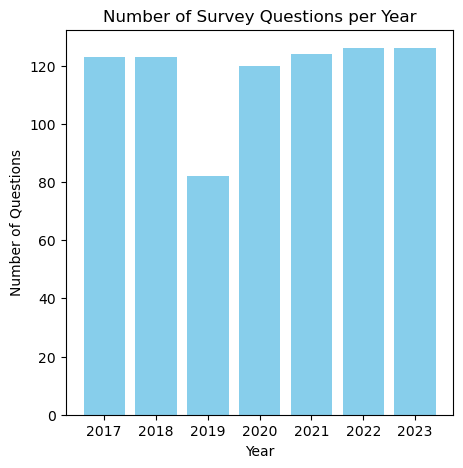

Total number of questions across all years: 824


In [7]:
# Unpack the cleaned DataFrames back into individual variables
df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023 = dfs

# Print and verify the questions are without HTML tags and asterisks
for year, df in zip(range(2017, 2024), dfs):
    print(f"{year} Questions:", df.columns.tolist())

# Count the number of questions (columns) in each DataFrame
question_counts_by_year = [len(df.columns) for df in dfs]
years = range(2017, 2024)

# Plotting the data
plt.figure(figsize=(5,5 ))
plt.bar(years, question_counts_by_year, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Questions')
plt.title('Number of Survey Questions per Year')
plt.xticks(years)
plt.show()

# Calculate the total number of questions across all DataFrames
total_questions = sum(len(df.columns) for df in dfs)

print("Total number of questions across all years:", total_questions)

### Counting Question Frequencies, Identifying Common and Unique Questions with Visualization of Question Distribution



In [8]:
all_columns = (list(df_2017.columns) + list(df_2018.columns) +
               list(df_2019.columns) + list(df_2020.columns) +
               list(df_2021.columns) + list(df_2022.columns) +
               list(df_2023.columns))

question_counts = Counter(all_columns)
most_common_questions = question_counts.most_common()
print(most_common_questions)

[('post-traumatic stress disorder', 12), ('are you self-employed?', 7), ('how many employees does your company or organization have?', 7), ('is your employer primarily a tech company/organization?', 7), ('is your primary role within your company related to tech/it?', 7), ('do you know the options for mental health care available under your employer-provided health coverage?', 7), ('has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', 7), ('does your employer offer resources to learn more about mental health disorders and options for seeking help?', 7), ('is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?', 7), ('if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?', 7), ('would you feel more comfortable talking to your coworkers about

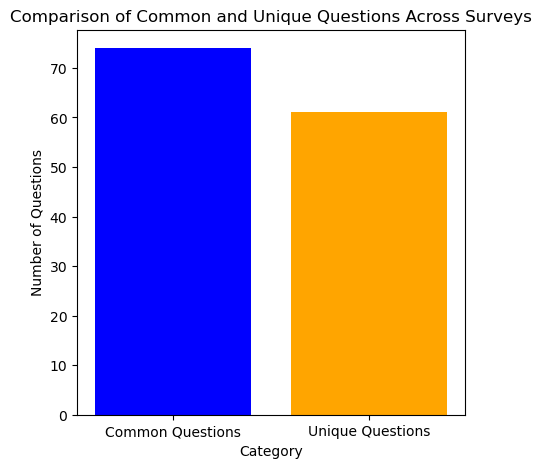

[74, 61]


In [9]:
# [EXTRA]

# Extract column names from each DataFrame
column_sets = [set(df.columns) for df in dfs]

# Find common and unique questions
common_questions = set.intersection(*column_sets)
unique_questions = set.union(*column_sets) - common_questions

# Count of common and unique questions
common_count = len(common_questions)
unique_count = len(unique_questions)

# Data for plotting
categories = ['Common Questions', 'Unique Questions']
counts = [common_count, unique_count]

# Creating a bar chart
plt.figure(figsize=(5,5))
plt.bar(categories, counts, color=['blue', 'orange'])
plt.xlabel('Category')
plt.ylabel('Number of Questions')
plt.title('Comparison of Common and Unique Questions Across Surveys')
plt.show()
print(counts)

### 6. Combine DataFrames and dropping invalid information





In [10]:
# Convert the common_questions set to a list
common_questions_list = list(common_questions)

# List of dataframes and corresponding years
df_list = [df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Add a 'Year' column to each DataFrame
for df, year in zip(df_list, years):
    df['Year'] = year

# Combine all DataFrames using common columns
# Add the 'Year' column to the list of common questions for concatenation
common_questions_list_with_year = common_questions_list + ['Year']
compiled_df = pd.concat([df[common_questions_list_with_year] for df in df_list], ignore_index=True)
cols = compiled_df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Year')))
compiled_df = compiled_df[cols]

In [11]:
# Display the shape of the compiled DataFrame
print("Shape of the compiled DataFrame:", compiled_df.shape)
print("========================================================")
# Display basic information about the compiled DataFrame
print("Information about the compiled DataFrame:")
compiled_df.info()
# compiled_df.sample()


Shape of the compiled DataFrame: (2006, 75)
Information about the compiled DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 75 columns):
 #   Column                                                                                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                                                                                               --------------  -----  
 0   Year                                                                                                                                                                                 2006 non-null   int64  
 1   describe the conversation you had with your previous coworkers about your mental health including their reactions.                                                          

In [12]:
def missing_value_percentage(df):
    percent_missing = df.isnull().mean() * 100
    missing_value_df = pd.DataFrame(percent_missing, columns=['percent_missing'])
    missing_value_df.reset_index(inplace=True)
    missing_value_df.rename(columns={'index': 'column_name'}, inplace=True)

    return missing_value_df

missing_values = missing_value_percentage(compiled_df)

In [13]:
def remove_columns_with_many_missing_values(df, threshold_percent):
    missing_percentage = df.isnull().mean() * 100
    columns_to_drop = missing_percentage[missing_percentage > threshold_percent].index
    df.drop(columns=columns_to_drop, inplace=True)

    return df

compiled_df = remove_columns_with_many_missing_values(compiled_df, 70)  # Adjust the threshold as needed in percentage
missing_values = missing_value_percentage(compiled_df)

In [14]:
# Rearrange the questions "would you bring up your mental health with a potential employer in an interview?" & "why or why not?.1" together
columns = list(compiled_df.columns)
index_of_target = columns.index("would you bring up your mental health with a potential employer in an interview?")
column_to_move = columns.pop(columns.index("why or why not?.1"))
columns.insert(index_of_target, column_to_move)
compiled_df = compiled_df[columns]

# Rearrange the questions "would you be willing to bring up a physical health issue with a potential employer in an interview?" & "why or why not?" together                                                                           " & "why or why not?.1" together
columns = list(compiled_df.columns)
index_of_target = columns.index("would you be willing to bring up a physical health issue with a potential employer in an interview?")
column_to_move = columns.pop(columns.index("why or why not?"))
columns.insert(index_of_target, column_to_move)
compiled_df = compiled_df[columns]

# COMPLETED COMPILED_DF
compiled_df.info()

# compiled_df.to_excel('precompiled_data.xlsx', index=False)
# files.download('precompiled_data.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 56 columns):
 #   Column                                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                                         --------------  -----  
 0   Year                                                                                                                                                                           2006 non-null   int64  
 1   did your previous employers provide resources to learn more about mental health disorders and how to seek help?                                                                1682 non-null   object 
 2   is your primary role within your company related to tech/it?            

## Preprocess columns to ensure consistent responses

### Identify unique values and their counts for each column to determine data cleaning methods


In [15]:
unique_values_counts = {}
for column in compiled_df.columns:
    unique_values_counts[column] = compiled_df[column].value_counts(dropna=False)  # Include NaN in the counts

# Displaying the unique values and counts for columns with 5 or fewer unique kinds of data
columns_with_fewer_than_v_unique_values = {k: v for k, v in unique_values_counts.items() if len(v) <= 4}
columns_with_fewer_than_v_unique_values


{'did your previous employers provide resources to learn more about mental health disorders and how to seek help?': did your previous employers provide resources to learn more about mental health disorders and how to seek help?
 None did             1089
 Some did              489
 NaN                   324
 Yes, they all did     104
 Name: count, dtype: int64,
 'is your primary role within your company related to tech/it?': is your primary role within your company related to tech/it?
 1.0    1583
 NaN     301
 0.0     122
 Name: count, dtype: int64,
 'does your employer offer resources to learn more about mental health disorders and options for seeking help?': does your employer offer resources to learn more about mental health disorders and options for seeking help?
 No              728
 Yes             558
 I don't know    419
 NaN             301
 Name: count, dtype: int64,
 'have you ever been diagnosed with a mental health disorder?': have you ever been diagnosed with a mental he

### **GENERAL FUNCTIONS**

#### **FUNCTION** to fill NA/Missing values with **MODE**

In [16]:
def fill_missing_with_mode(df, columns):
    # Fills missing values in specified columns with the mode of each column.
    for column in columns:
        if column in df.columns:
            mode_value = df[column].mode()[0]
            df[column] = df[column].fillna(mode_value)
    return df

#### **FUNCTION** to check **number of NAs** by column

In [17]:
def count_na_in_columns(df):
    # Check for NA values in each column and print the results
    for column in df.columns:
        na_count = df[column].isna().sum()
        print(f"{column}: {na_count} NA values")


def count_na_in_selected_columns(df, columns_to_check):
    # Ensure that the columns listed in columns_to_check are in the DataFrame
    valid_columns = [col for col in columns_to_check if col in df.columns]

    # Warn if some columns in columns_to_check are not found in the DataFrame
    missing_columns = list(set(columns_to_check) - set(valid_columns))
    if missing_columns:
        print(f"Warning: The following columns were not found in the DataFrame and will be skipped: {missing_columns}")

    # Check for NA values only in the specified (and valid) columns
    for column in valid_columns:
        na_count = df[column].isna().sum()
        print(f"{column}: {na_count} NA values")

#### **FUNCTION** to fill NA/Missing values with "I Don't Know"




In [18]:
def fill_missing_with_idk(df , columns):
  # Fills missing values in specified columns with idk.
    for column in columns:
        if column in df.columns:
            df[column] = df[column].fillna("I Don't Know")
    return df

### Dealing with **GROUND TRUTH**

In [19]:
ground_truth_columns = ['do you currently have a mental health disorder?']

def deal_with_ground_truth(df, columns):
    for column in columns:
        if column in df.columns:
            # Replace 'Possibly' with 'Yes'
            df[column] = df[column].replace('Possibly', 'Yes')
            # Drop rows where the column value is "Don't know"
            df = df[df[column] != "Don't Know"]

    return df


compiled_df = deal_with_ground_truth(compiled_df, ground_truth_columns)

# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, ground_truth_columns)

do you currently have a mental health disorder?: 0 NA values


In [20]:
compiled_df['do you currently have a mental health disorder?'].value_counts()

do you currently have a mental health disorder?
Yes    1201
No      620
Name: count, dtype: int64

In [21]:
compiled_df['do you currently have a mental health disorder?'].info()


<class 'pandas.core.series.Series'>
Index: 1821 entries, 0 to 2005
Series name: do you currently have a mental health disorder?
Non-Null Count  Dtype 
--------------  ----- 
1821 non-null   object
dtypes: object(1)
memory usage: 28.5+ KB


### Remove highly correlated columns


In [22]:
# Dropped columns that might interfere with our ML results
compiled_df = compiled_df.drop(['if you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?', 'have you ever been diagnosed with a mental health disorder?'], axis=1, )
compiled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1821 entries, 0 to 2005
Data columns (total 54 columns):
 #   Column                                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                                         --------------  -----  
 0   Year                                                                                                                                                                           1821 non-null   int64  
 1   did your previous employers provide resources to learn more about mental health disorders and how to seek help?                                                                1544 non-null   object 
 2   is your primary role within your company related to tech/it?                 

### Consistent Gender Response

In [23]:
# GENDER RESPONSE

# Sex column needs to be recoded (number of unique values = 70)
compiled_df['what is your gender?']

compiled_df['what is your gender?'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ', 'cis female', 'F, cisgender', 'Female-ish','cis woman', 'femmina',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F', 'Female-identified', 'Female, cis-gendered',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman', 'female (cisgender)', 'Cis woman', 'Female (cisgender)','Cis-Female', 'Cisgendered woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)', 'Female (cis) ', 'Woman-identified', 'Femile','Female (cis)','FEMALE','female, she/her',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender', 'female (cis)', 'My sex is female.','My sex is female.','cis-Female', 'I identify as female', 'cisgender female',
       'AFAB', 'femalw', 'femail'], value = 2, inplace = True)

compiled_df['what is your gender?'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm', 'dude','Ostensibly Male', 'male, born with xy chromosoms', 'Malel', 'Let\'s keep it simple and say "male"',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male', 'Identify as male', 'Masculine', 'Cishet male'
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ', 'Cisgender male', 'Cishet male','mostly male','cisgender male','MAle', 'male/he/him','cis-het male',
       'Cis Male', 'Male (trans, FtM)', 'cis male',
       'cisdude', 'cis man', 'MALE', 'cis male ','Mail','cis-male', 'Male-ish', 'masculino','CIS Male', 'male/androgynous ', 'I have a penis', 'cis hetero male', 'male (hey this is the tech industry you\'re talking about)','Cis-male', 'Male, cis'], value = 1, inplace = True)

compiled_df['what is your gender?'].replace(to_replace = ['Genderfluid', 'Nonbinary',
       'uhhhhhhhhh fem genderqueer?', 'God King of the Valajar',
       'Non-binary', 'Agender/genderfluid', 'sometimes', 'Contextual',
       'Non binary', 'Genderqueer demigirl', 'Genderqueer/non-binary',
       'nonbinary', '\\-', 'trans woman', 'Transfeminine', 'None',
       'Agender', '*shrug emoji* (F)', 'Male (or female, or both)',
       'Trans man', 'transgender', 'non binary',
       'Female/gender non-binary.', 'Trans woman', 'genderfluid',
       'Genderqueer', 'Demiguy', 'none', 'Trans female', 'non-binary',
       'She/her/they/them', 'Other', 'SWM', 'NB', 'Nonbinary/femme',
       'gender non-conforming woman', 'agender', 'Questioning', 'rr',
       'Agender trans woman', '43', 'I am a Wookie', 'Make',
       'Trans non-binary/genderfluid', 'Non-binary and gender fluid',
       'afab non-binary', 'b', 'homem cis', 'Non-binary/Agender', 'Queer',
       'varón'], value = 3, inplace = True)


In [24]:
compiled_df['what is your gender?'].value_counts()

what is your gender?
1.0    1174
2.0     557
3.0      62
Name: count, dtype: int64

### True False to 1 0(to export in excel, in Jupyter Notebook TRUE FALSE is automatically converted to 1 0)

In [25]:
true_false_columns = []

def convert_binary_columns(df):
  for col in df.columns:
    if set(df[col].dropna().unique()).issubset({0, 1, 0.0, 1.0, 'TRUE', 'FALSE', True, False}):
      true_false_columns.append(col)
      df[col] = df[col].replace({1.0: 1, 0.0: 0, 'TRUE': 1, 'FALSE': 0, True: 1, False: 0})
  return df

compiled_df = convert_binary_columns(compiled_df)
compiled_df = fill_missing_with_mode(compiled_df, true_false_columns)

# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, true_false_columns)


is your primary role within your company related to tech/it?: 0 NA values
are you self-employed?: 0 NA values
do you have previous employers?: 0 NA values
are you openly identified at work as a person with a mental health issue?: 0 NA values
was your employer primarily a tech company/organization?: 0 NA values
is your employer primarily a tech company/organization?: 0 NA values
have you ever sought treatment for a mental health disorder from a mental health professional?: 0 NA values
did you ever discuss your mental health with your previous employer?: 0 NA values
have you ever discussed your mental health with coworkers?: 0 NA values
have you ever had a coworker discuss their or another coworker's mental health with you?: 0 NA values
have you ever discussed your mental health with your employer?: 0 NA values
did you ever discuss your mental health with a previous coworker(s)?: 0 NA values
did you ever have a previous coworker discuss their or another coworker's mental health with you?

### Number range values , fill it with NA

In [26]:
number_range_columns = [
    'overall, how well do you think the tech industry supports employees with mental health issues?',
    'overall, how much importance did your previous employer place on physical health?',
    'how willing would you be to share with friends and family that you have a mental illness?',
    'overall, how much importance does your employer place on mental health?',
    'overall, how much importance does your employer place on physical health?',
    'overall, how much importance did your previous employer place on mental health?',
]

compiled_df = fill_missing_with_mode(compiled_df, number_range_columns)

# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, number_range_columns)


overall, how well do you think the tech industry supports employees with mental health issues?: 0 NA values
overall, how much importance did your previous employer place on physical health?: 0 NA values
how willing would you be to share with friends and family that you have a mental illness?: 0 NA values
overall, how much importance does your employer place on mental health?: 0 NA values
overall, how much importance does your employer place on physical health?: 0 NA values
overall, how much importance did your previous employer place on mental health?: 0 NA values


### YES, NO, MAYBE, Fill **NA** with **MAYBE**

In [27]:
yes_no_maybe_columns = [
    'would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
    'have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?',
    'would you feel comfortable discussing a mental health issue with your coworkers?'
]

def fill_missing_with_maybe(df, columns):
    # Fills missing values in specified columns with the mode of each column.
    for column in columns:
        if column in df.columns:
            df[column] = df[column].fillna("Maybe")
    return df

compiled_df = fill_missing_with_maybe(compiled_df, yes_no_maybe_columns)

# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, yes_no_maybe_columns)

would you feel comfortable discussing a mental health issue with your direct supervisor(s)?: 0 NA values
have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?: 0 NA values
would you feel comfortable discussing a mental health issue with your coworkers?: 0 NA values


### Columns that has different variety of values but ALL fill **NA** with **IDK**

In [28]:
idk_columns = [
    'did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
    'is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
    'have you had a mental health disorder in the past?',
    'do you know the options for mental health care available under your employer-provided health coverage?',
    'has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
    'was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
    'did your previous employers provide resources to learn more about mental health disorders and how to seek help?',
    'does your employer offer resources to learn more about mental health disorders and options for seeking help?',
    'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
    'would you have been willing to discuss your mental health with your direct supervisor(s)?',
    'have your previous employers provided mental health benefits?',
    'would you have been willing to discuss your mental health with your coworkers at previous employers?'
]

compiled_df = fill_missing_with_idk(compiled_df, idk_columns)

# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, idk_columns)


did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?: 0 NA values
is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?: 0 NA values
have you had a mental health disorder in the past?: 0 NA values
do you know the options for mental health care available under your employer-provided health coverage?: 0 NA values
has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?: 0 NA values
was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?: 0 NA values
did your previous employers provide resources to learn more about mental health disorders and how to seek help?: 0 NA values
does your employer offer resources to learn more about mental health disorders and options for

#### Further cleaning for those columns

In [29]:
# did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
# did your previous employers provide resources to learn more about mental health disorders and how to seek help?
# have your previous employers provided mental health benefits?
# Response: Yes (Yes they all did), No (None did), Some (Some did), I don't know
first_columns = [
    'did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
    'did your previous employers provide resources to learn more about mental health disorders and how to seek help?',
    'have your previous employers provided mental health benefits?'
]

def replace_one(df, columns):
  for column_name in columns:
    if column_name in df.columns:
        # Replace
        df[column_name] = df[column_name].replace('Yes, they all did', 'Yes')
        df[column_name] = df[column_name].replace('Some did', 'Some')
        df[column_name] = df[column_name].replace(['None did' , 'No, none did'], 'No')
        df[column_name] = df[column_name].replace(["Don't Know", "I don't know"], "I Don't Know")
  return df

compiled_df = replace_one(compiled_df , first_columns)
# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, first_columns)

# have you had a mental health disorder in the past?
# Response: No, Yes (Yes, Possibly), I Don't know
second_columns = [
    'have you had a mental health disorder in the past?'
]

def replace_two(df, columns):
  for column_name in columns:
    if column_name in df.columns:
        # Replace
        df[column_name] = df[column_name].replace('Possibly', 'Yes')
        df[column_name] = df[column_name].replace(["Don't Know", "I don't know"], "I Don't Know")
  return df


compiled_df = replace_two(compiled_df , second_columns)
# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, second_columns)

# was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
# Response: No, Yes (Yes always, Sometimes ), I Don't know
third_columns = [
    'was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?'
]

def replace_three(df, columns):
  for column_name in columns:
    if column_name in df.columns:
        # Replace
        df[column_name] = df[column_name].replace(['Yes, always' , 'Sometimes'], 'Yes')
        df[column_name] = df[column_name].replace(["Don't Know", "I don't know"], "I Don't Know")
  return df

compiled_df = replace_three(compiled_df , third_columns)
# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, third_columns)


# would you have been willing to discuss your mental health with your coworkers at previous employers?
# Response: Yes (Yes, at all of my), No (No, at none of my), Some (At some of my, Some of my), I Don't Know
fourth_columns = [
    'would you have been willing to discuss your mental health with your coworkers at previous employers?',
    'would you have been willing to discuss your mental health with your direct supervisor(s)?'
]

def replace_four(df, columns):
  for column_name in columns:
    if column_name in df.columns:
        # Replace
        df[column_name] = df[column_name].replace(['Yes, at all of my previous employers' , 'Yes, all of my previous supervisors'], 'Yes')
        df[column_name] = df[column_name].replace(['Some of my previous employers','Some of my previous supervisors','At some of my previous employers'] ,'Some')
        df[column_name] = df[column_name].replace(['No, none of my previous supervisors', 'No, at none of my previous employers',' No, at none of my previous employers'], "No")
  return df

compiled_df = replace_four(compiled_df , fourth_columns)
# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, fourth_columns)

did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?: 0 NA values
did your previous employers provide resources to learn more about mental health disorders and how to seek help?: 0 NA values
have your previous employers provided mental health benefits?: 0 NA values
have you had a mental health disorder in the past?: 0 NA values
was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?: 0 NA values
would you have been willing to discuss your mental health with your coworkers at previous employers?: 0 NA values
would you have been willing to discuss your mental health with your direct supervisor(s)?: 0 NA values


In [30]:
compiled_df['would you have been willing to discuss your mental health with your coworkers at previous employers?'].value_counts()

would you have been willing to discuss your mental health with your coworkers at previous employers?
Some            851
No              554
I Don't Know    277
Yes             139
Name: count, dtype: int64

### OTHERS Miscellaneous

In [31]:
compiled_df['would you feel more comfortable talking to your coworkers about your physical health or your mental health?'].value_counts()

would you feel more comfortable talking to your coworkers about your physical health or your mental health?
Physical health                   1042
Same level of comfort for each     487
Mental health                       29
Name: count, dtype: int64

In [32]:
# have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?
# RESPONSE: Yes (Yes I experienced, Yes I observerd, I've always been), No , Maybe (Maybe/Not Sure)
fifth_columns = [
    'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'
]

def replace_five(df, columns):
  for column_name in columns:
    if column_name in df.columns:
        # Replace
        df[column_name] = df[column_name].replace(['Yes, I experienced' , 'Yes, I observed'], 'Yes')
        df[column_name] = df[column_name].replace(['Some of my previous employers', 'At some of my previous employers'] ,'Some')
        df[column_name] = df[column_name].replace('Maybe/Not sure' , 'Maybe')
        df[column_name] = df[column_name].replace("I've always been self-employed" , 'No')

        df[column_name] = df[column_name].fillna("No")
  return df

compiled_df = replace_five(compiled_df , fifth_columns)
# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, fifth_columns)

# would you feel more comfortable talking to your coworkers about your physical health or your mental health?
# RESPONSE: Mental Health, Physical Healht, Same level of comfort, None
sixth_columns = [
    'would you feel more comfortable talking to your coworkers about your physical health or your mental health?'
]

def replace_six(df, columns):
  for column_name in columns:
    if column_name in df.columns:
      # fill na
      df[column_name] = df[column_name].fillna("None")
  return df

compiled_df = replace_six(compiled_df , sixth_columns)
# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, sixth_columns)

# were you aware of the options for mental health care provided by your previous employers?
# RESPONSE: Aware, Not Aware
seventh_columns = [
    'were you aware of the options for mental health care provided by your previous employers?'
]

def replace_seven(df, columns):
  for column_name in columns:
    if column_name in df.columns:
      # replace
      df[column_name] = df[column_name].replace(['I was aware of some', 'Yes, I was aware of all of them' , 'N/A (none offered)'] , 'Aware')
      df[column_name] = df[column_name].replace(['N/A (was not aware)','No, I only became aware later'] , 'Not Aware')
      # fill na
      df[column_name] = df[column_name].fillna("Not Aware")
  return df

compiled_df = replace_seven(compiled_df , seventh_columns)
# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, seventh_columns)


#would you have felt more comfortable talking to your previous employer about your physical health or your mental health?
# RESPONSE: Mental Health, Physical Health,Same level of comfort for each, None
eighth_columns = [
   "would you have felt more comfortable talking to your previous employer about your physical health or your mental health?"
]

def replace_eight(df, columns):
  for column_name in columns:
    if column_name in df.columns:
      # fill na
      df[column_name] = df[column_name].fillna("None")
  return df

compiled_df = replace_eight(compiled_df ,eighth_columns)
# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, eighth_columns)


have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?: 0 NA values
would you feel more comfortable talking to your coworkers about your physical health or your mental health?: 0 NA values
were you aware of the options for mental health care provided by your previous employers?: 0 NA values
would you have felt more comfortable talking to your previous employer about your physical health or your mental health?: 0 NA values


In [33]:
compiled_df["would you have felt more comfortable talking to your previous employer about your physical health or your mental health?"].value_counts()

would you have felt more comfortable talking to your previous employer about your physical health or your mental health?
Physical health                   1141
Same level of comfort for each     381
None                               277
Mental health                       22
Name: count, dtype: int64

### Standardise the "I Don't Know"

In [34]:
def standardize_dont_know(df):
    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Check if the column data type is object, indicating it likely contains strings
        if df[column].dtype == 'object':
            # Replace "I don't know" with "I Don't Know" in the current column
            df[column] = df[column].replace("I don't know", "I Don't Know", regex=False)
    return df

compiled_df = standardize_dont_know(compiled_df)

In [35]:
len(compiled_df)

1821

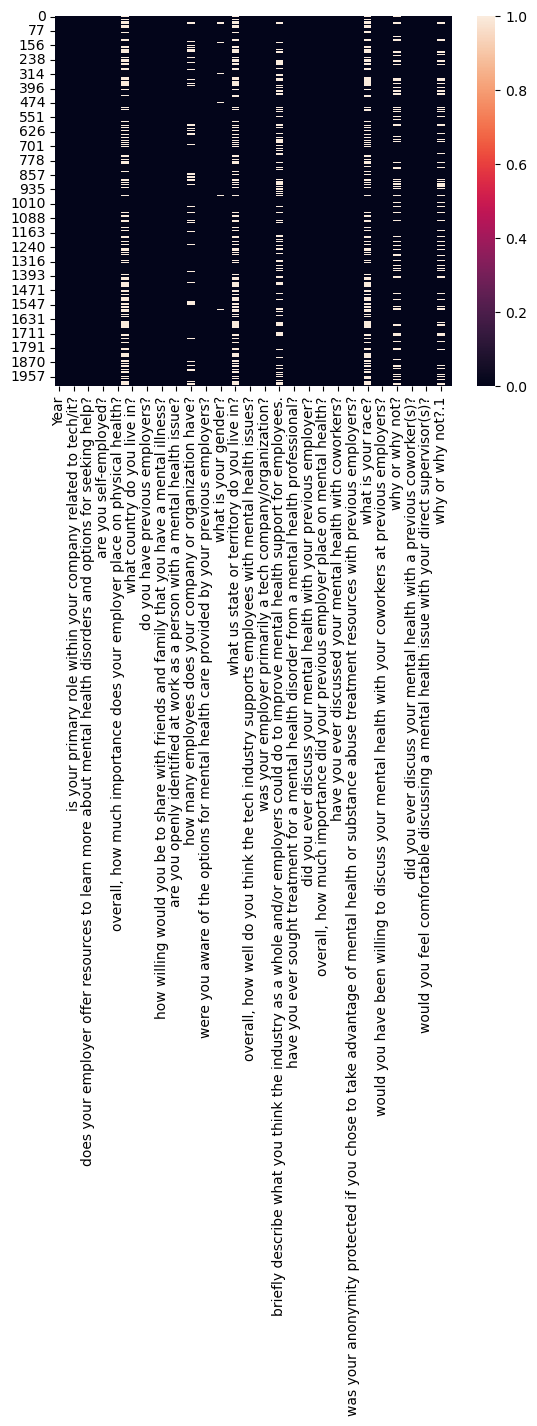

In [36]:
# NAs in compiled_df before processing
sns.heatmap(data = compiled_df.isna());

In [37]:
# compiled_df.to_excel('cleaned_data.xlsx', index=False)
# files.download('cleaned_data.xlsx')

# Graphs

## Demographics

### 1. Geographic Location

C:\Users\Lim Yin Yao\AppData\Local\Temp\ipykernel_17292\2330320369.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
C:\Users\Lim Yin Yao\AppData\Local\Temp\ipykernel_17292\2330320369.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15, ha="right")


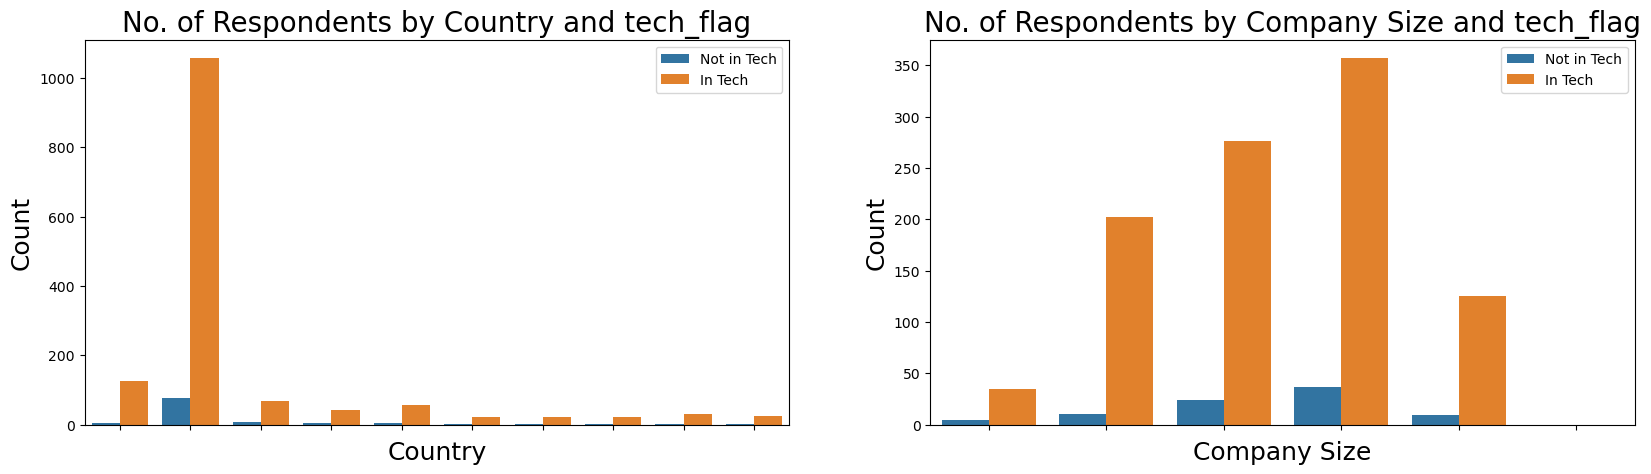

<Figure size 1600x400 with 0 Axes>

In [38]:
# Most respondents are tech and also most of them are in US.
# Most techs are in medium and large companies
# For future analysis, we will exclude all people non-tech - as this analysis focuses on mental health in tech

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.figure(figsize = (16,4))
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
# plt.suptitle('Main Title')

# No of respondents by Country [ONLY TOP 10]
top_countries = compiled_df['what country do you work in?'].value_counts().head(10).index
filtered_df = compiled_df[compiled_df['what country do you work in?'].isin(top_countries)]

sns.countplot(x = filtered_df['what country do you work in?'], hue = compiled_df['is your primary role within your company related to tech/it?'], ax=ax1)
ax1.set_title('No. of Respondents by Country and tech_flag', fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend(['Not in Tech', 'In Tech'])

# No of respondents by Company Size
sns.countplot(x = compiled_df['how many employees does your company or organization have?'], hue = compiled_df['is your primary role within your company related to tech/it?'], ax=ax2,
              order = ['1-5', '6-25', '26-100', '100-500', '500-1000', '>1000'])
ax2.set_title('No. of Respondents by Company Size and tech_flag', fontsize = 20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15, ha="right")
ax2.set_xlabel('Company Size', fontsize = 18)
ax2.set_ylabel('Count', fontsize = 18)
ax2.legend(['Not in Tech', 'In Tech']);

In [39]:
# FOCUS MAINLY ON USA
# Filter the DataFrame to include only rows where the country is 'United States of America'
usa_df = compiled_df[compiled_df['what country do you work in?'] == 'United States of America']

pd.set_option('display.max_columns', None)
usa_df.sample(20)

Year  \
1461  2019   
525   2017   
2     2017   
1080  2018   
512   2017   
71    2017   
309   2017   
269   2017   
92    2017   
462   2017   
1377  2019   
250   2017   
784   2018   
664   2017   
1282  2019   
735   2017   
1303  2019   
1071  2018   
595   2017   
802   2018   

     did your previous employers provide resources to learn more about mental health disorders and how to seek help?  \
1461                                                 No                                                                
525                                                Some                                                                
2                                                    No                                                                
1080                                                 No                                                                
512                                                  No                                                                
71                                                 Some                                                                
309                                                  No                                                                
269                                                  No                                                                
92                                                   No                                                                
462                                                  No                                                                
1377                                                 No                                                                
250                                                  No                                                                
784                                                  No                                                                
664                                                Some                                                                
1282                                               Some                                                                
735                                                  No                                                                
1303                                                 No                                                                
1071                                               Some                                                                
595                                                  No                                                                
802                                                  No                                                                

      is your primary role within your company related to tech/it?  \
1461                                                1.0              
525                                                 1.0              
2                                                   1.0              
1080                                                1.0              
512                                                 0.0              
71                                                  1.0              
309                                                 1.0              
269                                                 0.0              
92                                                  1.0              
462                                                 1.0              
1377                                                0.0              
250                                                 1.0              
784                                                 1.0              
664                                                 1.0              
1282                                                1.0              
735                                                 1.0              


### 2. Gender (only techs)

C:\Users\Lim Yin Yao\AppData\Local\Temp\ipykernel_17292\2841255719.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")


<Figure size 1600x500 with 0 Axes>

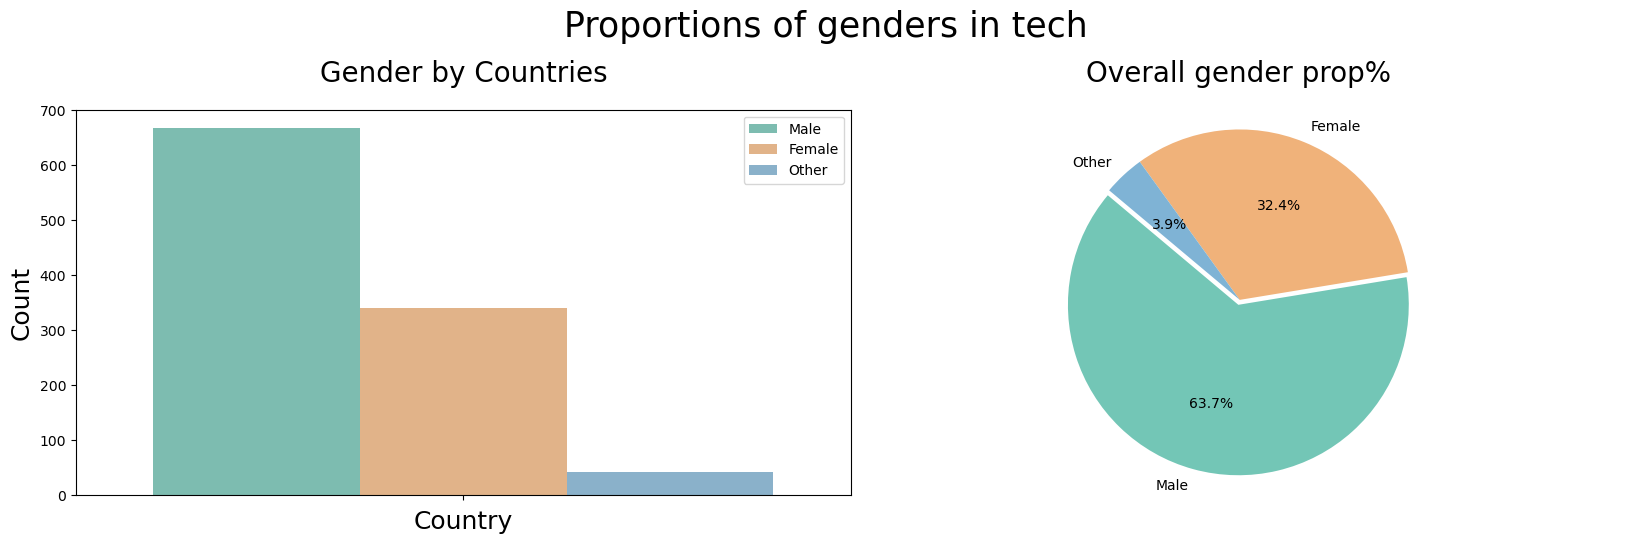

In [40]:
plt.figure(figsize = (16,5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Proportions of genders in tech', fontsize = 25, y=1.08)

# Pie Chart
all_techs = usa_df[usa_df['is your primary role within your company related to tech/it?'] == 1]['what is your gender?'].count()
males = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['what is your gender?'] == 1.0)]['what is your gender?'].count()
females = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['what is your gender?'] == 2.0)]['what is your gender?'].count()
other = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['what is your gender?'] == 3.0)]['what is your gender?'].count()

labels = 'Male', 'Female', 'Other'
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
gender_colors = {1.0: '#73C6B6', 2.0: '#F0B27A', 3.0: '#7FB3D5'}
explode = (0.03, 0, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Overall gender prop%', pad = 20, fontsize = 20)

# Barchart
sns.countplot(x = usa_df[usa_df['is your primary role within your company related to tech/it?'] == 1]['what country do you work in?'], palette=gender_colors , hue = usa_df['what is your gender?'], ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('Gender by Countries', pad = 20, fontsize = 20)
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend(['Male', 'Female', 'Other']);

### 3. Age

Distribution is skewed to the left, with the age of respondents being around 30-40 years old, so quite young, but with enough work experience already.

In [41]:
usa_df[usa_df['is your primary role within your company related to tech/it?'] == 1]['what is your age?'].describe()

count    1057.000000
mean       36.279092
std        10.703682
min         0.000000
25%        30.000000
50%        35.000000
75%        41.000000
max       223.000000
Name: what is your age?, dtype: float64

C:\Users\Lim Yin Yao\AppData\Local\Temp\ipykernel_17292\795023553.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_df['Gender Label'] = tech_df['what is your gender?'].map(gender_map)
C:\Users\Lim Yin Yao\AppData\Local\Temp\ipykernel_17292\795023553.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_df['Age Group'] = pd.cut(tech_df['what is your age?'], bins=bins, labels=labels, right=False)


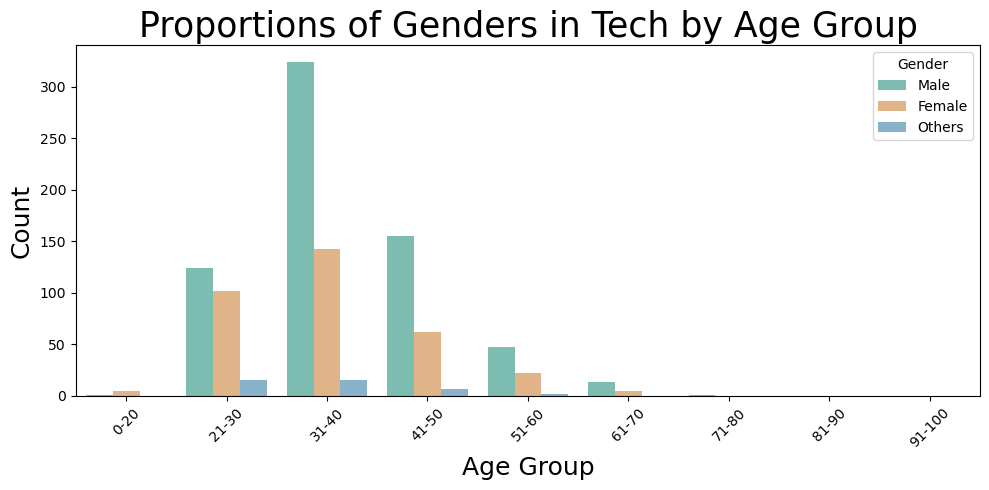

In [42]:
# Filter to include only those in tech roles
tech_df = usa_df[usa_df['is your primary role within your company related to tech/it?'] == 1]

gender_map = {1.0: 'Male', 2.0: 'Female', 3.0: 'Others'}
tech_df['Gender Label'] = tech_df['what is your gender?'].map(gender_map)

# Bin the ages
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Adjust bins as necessary
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
gender_colors = {'Male': '#73C6B6', 'Female': '#F0B27A', 'Others': '#7FB3D5'}
tech_df['Age Group'] = pd.cut(tech_df['what is your age?'], bins=bins, labels=labels, right=False)

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(x='Age Group', hue='Gender Label', data=tech_df, palette=gender_colors)
plt.title('Proportions of Genders in Tech by Age Group', fontsize=25)
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45)
plt.legend(title='Gender')

plt.tight_layout()
plt.show()


## Insights from Tech

### Have/Had mental health disorder
52.1% of the respondents confirm that they have at the moment a mental health disorder, while more than half of the respondents said that they had a mental health disorder in the past.

What is worring is the amount of respondents that answered "maybe" to this question, meaning a necessity to more support and guidance to identifying and addressing any issue that raised that "maybe" response in the first place.

C:\Users\Lim Yin Yao\AppData\Local\Temp\ipykernel_17292\4027039894.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")


<Figure size 1600x500 with 0 Axes>

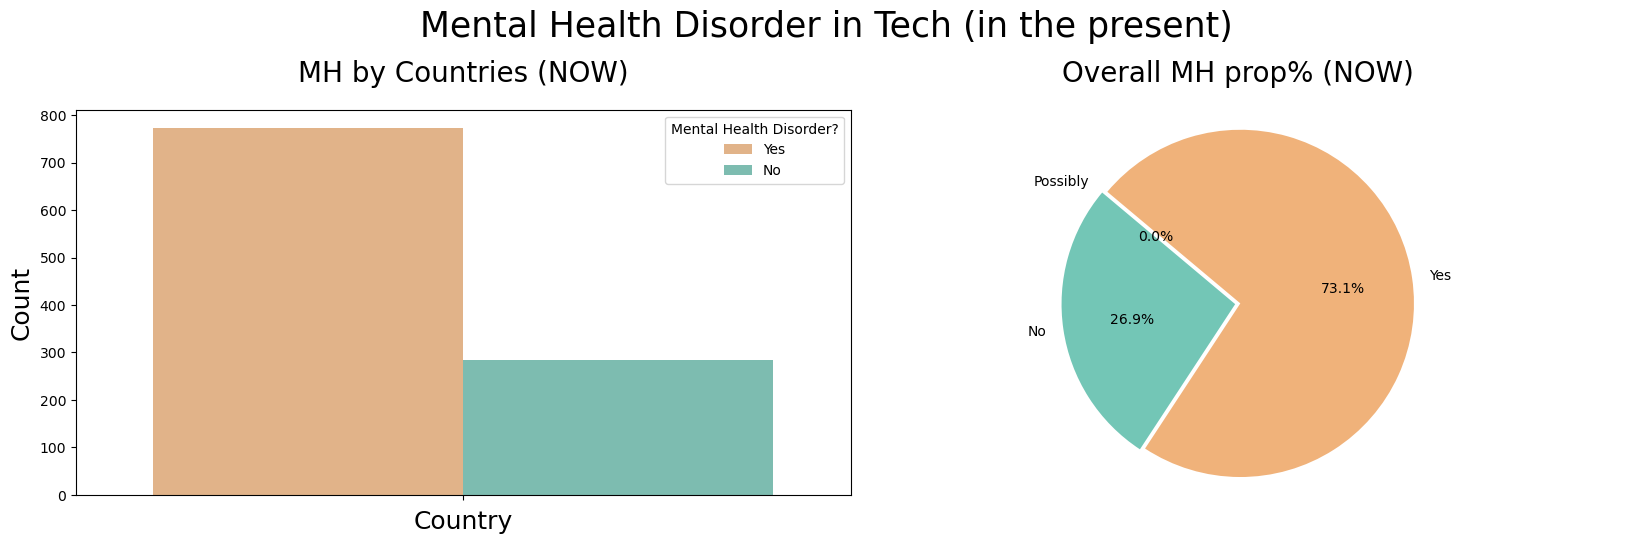

In [43]:
# ----------- NOW -----------

plt.figure(figsize = (16,5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Mental Health Disorder in Tech (in the present)', fontsize = 25, y=1.08)

# Pie Chart (Now)
all_techs_now = usa_df[usa_df['is your primary role within your company related to tech/it?'] == 1]['do you currently have a mental health disorder?'].count()
no_now = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['do you currently have a mental health disorder?'] == 'No')]['do you currently have a mental health disorder?'].count()
yes_now = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['do you currently have a mental health disorder?'] == 'Yes')]['do you currently have a mental health disorder?'].count()
maybe_now = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['do you currently have a mental health disorder?'] == 'Possibly')]['do you currently have a mental health disorder?'].count()

labels = 'No', 'Yes', 'Possibly'
sizes = [no_now/all_techs_now, yes_now/all_techs_now, maybe_now/all_techs_now]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0, 0.03, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Overall MH prop% (NOW)', pad = 20, fontsize = 20)

# Barchart (now)
filtered_df = usa_df[
    (usa_df['is your primary role within your company related to tech/it?'] == 1) &
    (usa_df['do you currently have a mental health disorder?'].isin(['Yes', 'No', 'Possibly']))
]

# Define custom colors for the categories
colors = ['#F0B27A','#73C6B6', '#7FB3D5']
categories = ['Yes', 'No', 'Possibly']
palette = dict(zip(categories, colors))


sns.countplot(
    x = 'what country do you work in?',
    hue = 'do you currently have a mental health disorder?',
    data = filtered_df,
    palette=palette,
    ax = ax1
)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('MH by Countries (NOW)', pad = 20, fontsize = 20)
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend(title='Mental Health Disorder?')


In [44]:
usa_df['is your primary role within your company related to tech/it?'].value_counts()

is your primary role within your company related to tech/it?
1.0    1057
0.0      77
Name: count, dtype: int64

C:\Users\Lim Yin Yao\AppData\Local\Temp\ipykernel_17292\1608754272.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")


<Figure size 1600x500 with 0 Axes>

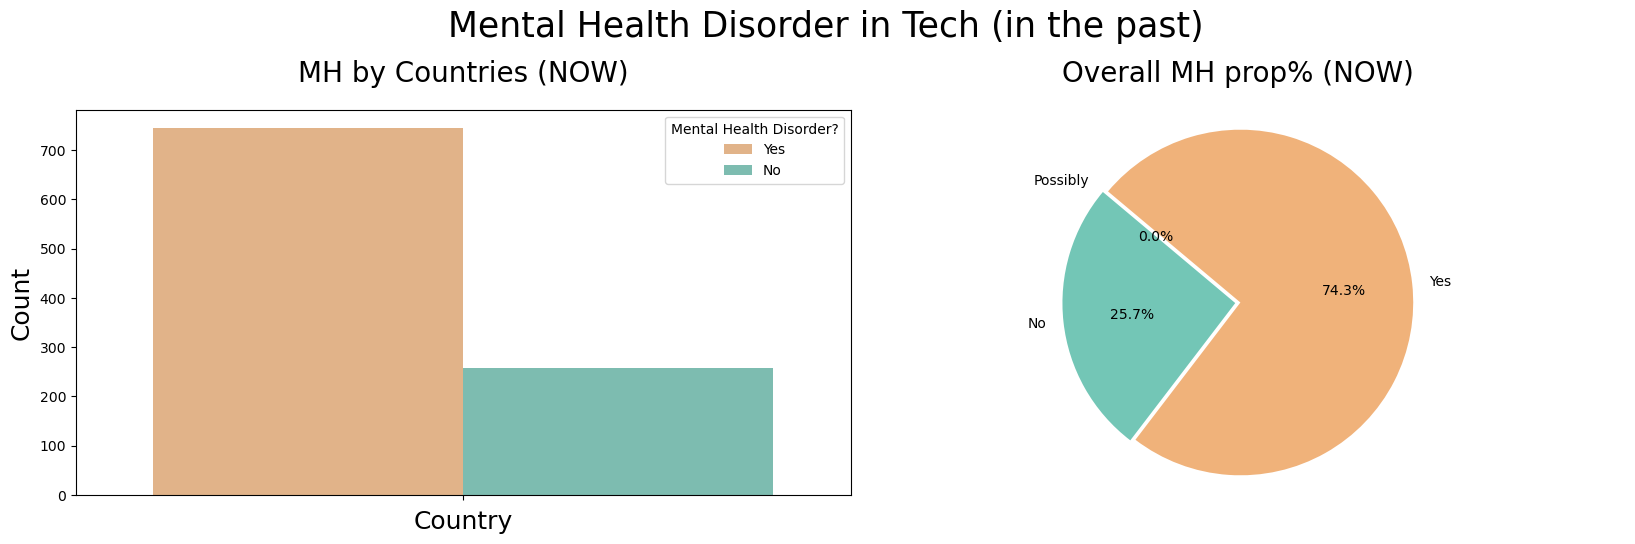

In [45]:
# -----------   PAST -----------

plt.figure(figsize = (16,5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Mental Health Disorder in Tech (in the past)', fontsize = 25, y=1.08)

# Pie Chart (Now)
all_techs_now = usa_df[usa_df['is your primary role within your company related to tech/it?'] == 1]['have you had a mental health disorder in the past?'].count()
no_now = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['have you had a mental health disorder in the past?'] == 'No')]['have you had a mental health disorder in the past?'].count()
yes_now = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['have you had a mental health disorder in the past?'] == 'Yes')]['have you had a mental health disorder in the past?'].count()
maybe_now = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['have you had a mental health disorder in the past?'] == 'Possibly')]['have you had a mental health disorder in the past?'].count()

labels = 'No', 'Yes', 'Possibly'
sizes = [no_now/all_techs_now, yes_now/all_techs_now, maybe_now/all_techs_now]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0, 0.03, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Overall MH prop% (NOW)', pad = 20, fontsize = 20)

# Barchart (now)
filtered_df = usa_df[
    (usa_df['is your primary role within your company related to tech/it?'] == 1) &
    (usa_df['have you had a mental health disorder in the past?'].isin(['Yes', 'No', 'Possibly']))
]

# Define custom colors for the categories
colors = ['#F0B27A','#73C6B6', '#7FB3D5']
categories = ['Yes', 'No', 'Possibly']
palette = dict(zip(categories, colors))


sns.countplot(
    x = 'what country do you work in?',
    hue = 'have you had a mental health disorder in the past?',
    data = filtered_df,
    palette=palette,
    ax = ax1
)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('MH by Countries (NOW)', pad = 20, fontsize = 20)
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend(title='Mental Health Disorder?')

### Are companies taking seriously on Mental Health

From the averages in the survey, I would say yes, but not as much as it would be necessary. More than half of respondents have a Mental Health Coverage provided, but not the resorces of finding more information about this, meaning that most companies address mental health, but do not implicate themselves actively in it.

More than 70% of respondents do NOT know if their annonimity would be protected in the case of talking to a superior about their mental health problems, while half of them are not sure that the company would grant them a mental health medical leave.

Lastly, most respondents do not know if their company is taking mental health problems as serious as physical health. What is encouraging is that 94% of respondents do not think that there would be negative consequences for coworkers that experience mental health problems.

In [46]:
# $

# fig, ax = plt.subplots(figsize = (16, 12), ncols=2, nrows=3)
# plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top = 0.9, wspace=0, hspace = 0.3)
# plt.suptitle('Are the Companies taking seriously mental health?', fontsize = 25, y = 1)

# # Does your employer provide mental health benefits as part of healthcare coverage?
# all_ = imp_data[imp_data['tech_flag'] == 1]['mh_coverage_flag'].count()
# no_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_coverage_flag'] == 'No')]['mh_coverage_flag'].count()
# yes_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_coverage_flag'] == 'Yes')]['mh_coverage_flag'].count()
# not_know_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_coverage_flag'] == "I don't know")]['mh_coverage_flag'].count()
# not_elig_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_coverage_flag'] == 'Not eligible for coverage / N/A')]['mh_coverage_flag'].count()

# labels = 'No', 'Yes', 'Not Know', 'Not Elig.'
# sizes = [no_/all_, yes_/all_, not_know_/all_, not_elig_/all_]
# colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3']
# explode = (0, 0.03, 0, 0)  # explode 1st slice

# ax[0][0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
# ax[0][0].axis('equal')
# ax[0][0].set_title('MH Coverage Provided', pad = 14, fontsize = 18)

# # Does your employer offer resources to learn more about mental health concerns and options for seeking help?
# all_ = imp_data[imp_data['tech_flag'] == 1]['mh_resources_provided'].count()
# no_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_resources_provided'] == 'No')]['mh_resources_provided'].count()
# yes_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_resources_provided'] == 'Yes')]['mh_resources_provided'].count()
# not_know_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_resources_provided'] == "I don't know")]['mh_resources_provided'].count()

# labels = 'No', 'Yes', 'Not Know'
# sizes = [no_/all_, yes_/all_, not_know_/all_]
# colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
# explode = (0.03, 0, 0)  # explode 1st slice

# ax[0][1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
# ax[0][1].axis('equal')
# ax[0][1].set_title('MH Resources Provided', pad = 14, fontsize = 18)

# # Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
# all_ = imp_data[imp_data['tech_flag'] == 1]['mh_anonimity_flag'].count()
# no_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_anonimity_flag'] == 'No')]['mh_anonimity_flag'].count()
# yes_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_anonimity_flag'] == 'Yes')]['mh_anonimity_flag'].count()
# not_know_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_anonimity_flag'] == "I don't know")]['mh_anonimity_flag'].count()

# labels = 'No', 'Yes', 'Not Know'
# sizes = [no_/all_, yes_/all_, not_know_/all_]
# colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
# explode = (0, 0, 0.03)  # explode 1st slice

# ax[1][0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
# ax[1][0].axis('equal')
# ax[1][0].set_title('MH Anonimity Provided', pad = 14, fontsize = 18)

# # If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
# all_ = imp_data[imp_data['tech_flag'] == 1]['mh_medical_leave'].count()
# veasy_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_medical_leave'] == 'Very easy')]['mh_medical_leave'].count()
# seasy_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_medical_leave'] == 'Somewhat easy')]['mh_medical_leave'].count()
# middle_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_medical_leave'] == "Neither easy nor difficult")]['mh_medical_leave'].count()
# vdiff_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_medical_leave'] == "Very difficult")]['mh_medical_leave'].count()
# sdiff_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_medical_leave'] == "Somewhat difficult")]['mh_medical_leave'].count()
# not_know_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_medical_leave'] == "I don't know")]['mh_medical_leave'].count()

# labels = 'V Easy', 'S Easy', 'Middle', 'V Difficult', 'S Difficult', 'Not Know'
# sizes = [veasy_/all_, seasy_/all_, middle_/all_, vdiff_/all_, sdiff_/all_, not_know_/all_]
# colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3', '#ABEBC6', '#F4D03F']
# explode = (0, 0.03, 0, 0, 0, 0)  # explode 1st slice

# ax[1][1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
# ax[1][1].axis('equal')
# ax[1][1].set_title('MH Medical Leave Request', pad = 14, fontsize = 18)

# # Do you feel that your employer takes mental health as seriously as physical health?
# all_ = imp_data[imp_data['tech_flag'] == 1]['mh_eq_ph_employer'].count()
# no_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_eq_ph_employer'] == 'No')]['mh_eq_ph_employer'].count()
# yes_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_eq_ph_employer'] == 'Yes')]['mh_eq_ph_employer'].count()
# not_know_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_eq_ph_employer'] == "I don't know")]['mh_eq_ph_employer'].count()

# labels = 'No', 'Yes', 'Not Know'
# sizes = [no_/all_, yes_/all_, not_know_/all_]
# colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
# explode = (0, 0, 0.03)  # explode 1st slice

# ax[2][0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
# ax[2][0].axis('equal')
# ax[2][0].set_title('Mental & Physical Health Equal Importance', pad = 14, fontsize = 18)

# # Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
# all_ = imp_data[imp_data['tech_flag'] == 1]['mh_conseq_coworkers'].count()
# no_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_conseq_coworkers'] == 'No')]['mh_conseq_coworkers'].count()
# yes_ = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_conseq_coworkers'] == 'Yes')]['mh_conseq_coworkers'].count()

# labels = 'No', 'Yes'
# sizes = [no_/all_, yes_/all_]
# colors = ['#7FB3D5', '#73C6B6']
# explode = (0.08, 0)  # explode 1st slice

# ax[2][1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
# ax[2][1].axis('equal')
# ax[2][1].set_title('Neg. Conseq for Coworkers with MH Disorders', pad = 14, fontsize = 18);

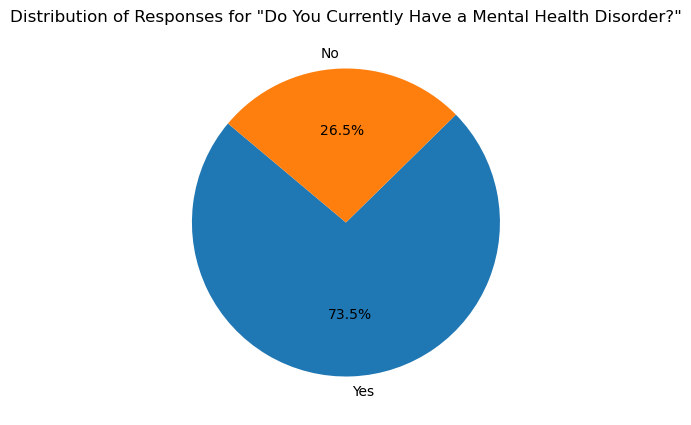

do you currently have a mental health disorder?
Yes    833
No     301
Name: count, dtype: int64


In [47]:
# The 'ground truth'
# Count the values for the specified column
value_counts = usa_df["do you currently have a mental health disorder?"].value_counts()

# Plotting the value counts as a pie chart
plt.figure(figsize=(5,5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Responses for "Do You Currently Have a Mental Health Disorder?"')
plt.show()

print(value_counts)

In [48]:
compiled_df[['overall, how well do you think the tech industry supports employees with mental health issues?']].value_counts()

overall, how well do you think the tech industry supports employees with mental health issues?
3.0                                                                                               720
2.0                                                                                               561
1.0                                                                                               260
4.0                                                                                               246
5.0                                                                                                34
Name: count, dtype: int64

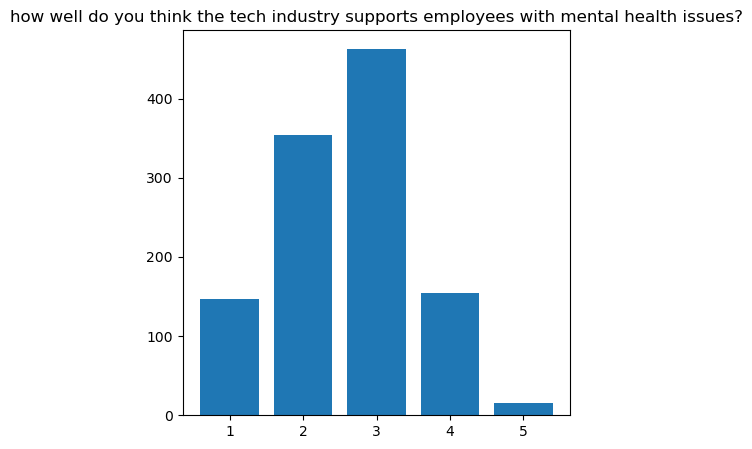

In [49]:
compiled_df[['overall, how well do you think the tech industry supports employees with mental health issues?']]

plt.figure(figsize=(5,5))
plt.bar(height=usa_df['overall, how well do you think the tech industry supports employees with mental health issues?'].value_counts(), x=usa_df['overall, how well do you think the tech industry supports employees with mental health issues?'].value_counts().index)
plt.title('how well do you think the tech industry supports employees with mental health issues?')
plt.show()

# Feature Engineering


## Encoding


In [50]:
cols = [x for x in compiled_df.columns if x not in ['Year','what country do you work in?', 'why or why not?', 'what country do you live in?', 'why or why not?.1', 'what is your age?', 'how many employees does your company or organization have?', 'what is your gender?',
       'briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.', 'what us state or territory do you live in?', 'what us state or territory do you work in?', 'what is your race?']]

In [51]:
data_to_encode = compiled_df[cols]
data_not_encode = compiled_df[['Year','what country do you work in?', 'why or why not?', 'what country do you live in?', 'why or why not?.1', 'what is your age?', 'how many employees does your company or organization have?', 'what is your gender?',
       'briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.', 'what us state or territory do you live in?', 'what us state or territory do you work in?', 'what is your race?']]

In [52]:
data_to_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1821 entries, 0 to 2005
Data columns (total 42 columns):
 #   Column                                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                                         --------------  -----  
 0   did your previous employers provide resources to learn more about mental health disorders and how to seek help?                                                                1821 non-null   object 
 1   is your primary role within your company related to tech/it?                                                                                                                   1821 non-null   float64
 2   have you had a mental health disorder in the past?                           

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


def encode(data):
    # Identify categorical columns
    cat_columns = list(data.select_dtypes(include=['category', 'object']).columns)

    # Create the ColumnTransformer to apply OneHotEncoding to the categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), cat_columns)
        ],
        remainder='passthrough'  # This leaves the rest of the columns in the dataset unchanged
    )

    # Apply the ColumnTransformer to the entire DataFrame
    data_transformed = preprocessor.fit_transform(data)

    # Get feature names for one-hot encoded columns
    encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns)

    # Combine with the rest of the columns that were not encoded
    non_cat_columns = [col for col in data.columns if col not in cat_columns]
    all_feature_names = list(encoded_feature_names) + non_cat_columns

    # Convert the transformed data back to a DataFrame, ensure the index matches the original data
    encoded_data = pd.DataFrame(data_transformed, columns=all_feature_names, index=data.index)

    return encoded_data

matrix = encode(data_to_encode)
encoded_data = pd.DataFrame(matrix) # to dataframe

# Preprocessed data
prep_data = pd.concat(objs = [encoded_data, data_not_encode], axis = 1)
prep_cat_data = encoded_data


## wrong!!!


In [54]:
prep_data

did your previous employers provide resources to learn more about mental health disorders and how to seek help?_I Don't Know  \
0                                                   0.0                                                                              
1                                                   0.0                                                                              
2                                                   0.0                                                                              
3                                                   1.0                                                                              
4                                                   0.0                                                                              
...                                                 ...                                                                              
2001                                                0.0                                                                              
2002                                                0.0                                                                              
2003                                                0.0                                                                              
2004                                                0.0                                                                              
2005                                                0.0                                                                              

      did your previous employers provide resources to learn more about mental health disorders and how to seek help?_No  \
0                                                   0.0                                                                    
1                                                   1.0                                                                    
2                                                   1.0                                                                    
3                                                   0.0                                                                    
4                                                   1.0                                                                    
...                                                 ...                                                                    
2001                                                0.0                                                                    
2002                                                0.0                                                                    
2003                                                0.0                                                                    
2004                                                0.0                                                                    
2005                                                1.0                                                                    

      did your previous employers provide resources to learn more about mental health disorders and how to seek help?_Some  \
0                                                   1.0                                                                      
1                                                   0.0                                                                      
2                                                   0.0                                                                      
3                                                   0.0                                                                      
4                                                   0.0                                                                      
...                                                 ...                                                                      
2001                      

In [55]:
prep_cat_data

did your previous employers provide resources to learn more about mental health disorders and how to seek help?_I Don't Know  \
0                                                   0.0                                                                              
1                                                   0.0                                                                              
2                                                   0.0                                                                              
3                                                   1.0                                                                              
4                                                   0.0                                                                              
...                                                 ...                                                                              
2001                                                0.0                                                                              
2002                                                0.0                                                                              
2003                                                0.0                                                                              
2004                                                0.0                                                                              
2005                                                0.0                                                                              

      did your previous employers provide resources to learn more about mental health disorders and how to seek help?_No  \
0                                                   0.0                                                                    
1                                                   1.0                                                                    
2                                                   1.0                                                                    
3                                                   0.0                                                                    
4                                                   1.0                                                                    
...                                                 ...                                                                    
2001                                                0.0                                                                    
2002                                                0.0                                                                    
2003                                                0.0                                                                    
2004                                                0.0                                                                    
2005                                                1.0                                                                    

      did your previous employers provide resources to learn more about mental health disorders and how to seek help?_Some  \
0                                                   1.0                                                                      
1                                                   0.0                                                                      
2                                                   0.0                                                                      
3                                                   0.0                                                                      
4                                                   0.0                                                                      
...                                                 ...                                                                      
2001                      

Ordinal Encoder (find unique values and encode them accordingly)

In [56]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
prep_data_ordinal = data_to_encode
prep_data_ordinal = enc.fit_transform(data_to_encode)


# Convert the numpy array back to a DataFrame
columns = data_to_encode.columns
prep_data_ordinal_df = pd.DataFrame(prep_data_ordinal, columns=columns)


In [57]:
prep_data_ordinal_df

did your previous employers provide resources to learn more about mental health disorders and how to seek help?  \
0                                                   2.0                                                                 
1                                                   1.0                                                                 
2                                                   1.0                                                                 
3                                                   0.0                                                                 
4                                                   1.0                                                                 
...                                                 ...                                                                 
1816                                                2.0                                                                 
1817                                                2.0                                                                 
1818                                                2.0                                                                 
1819                                                2.0                                                                 
1820                                                1.0                                                                 

      is your primary role within your company related to tech/it?  \
0                                                   1.0              
1                                                   1.0              
2                                                   1.0              
3                                                   1.0              
4                                                   1.0              
...                                                 ...              
1816                                                1.0              
1817                                                1.0              
1818                                                0.0              
1819                                                1.0              
1820                                                1.0              

      have you had a mental health disorder in the past?  \
0                                                   2.0    
1                                                   2.0    
2                                                   2.0    
3                                                   1.0    
4                                                   2.0    
...                                                 ...    
1816                                                1.0    
1817                                                2.0    
1818                                                2.0    
1819                                                2.0    
1820                                                1.0    

      does your employer offer resources to learn more about mental health disorders and options for seeking help?  \
0                                                   0.0                                                              
1                                                   1.0                                                              
2                                                   1.0                                                              
3                                                   0.0                                                              
4                                                   0.0                                                              
...                                                 ...                                                              
1816                                                0.0                                                              
1817                                           

## Feature Selection
Trying different approaches and comparing results:

- Correlation [Unsupervised]
- Chi-2
- RFE [Supervised]
- SMLR
- ReliefF

**TAKE NOTE:**
[ Label Encoding ]
1. prep_data [MIX of cat and non-cat]
2. prep_cat_data [cat only]
[ Ordinal Encoding ]
1. prep_data_ordinal_df [cat only]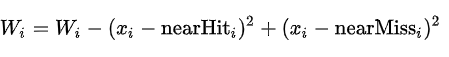

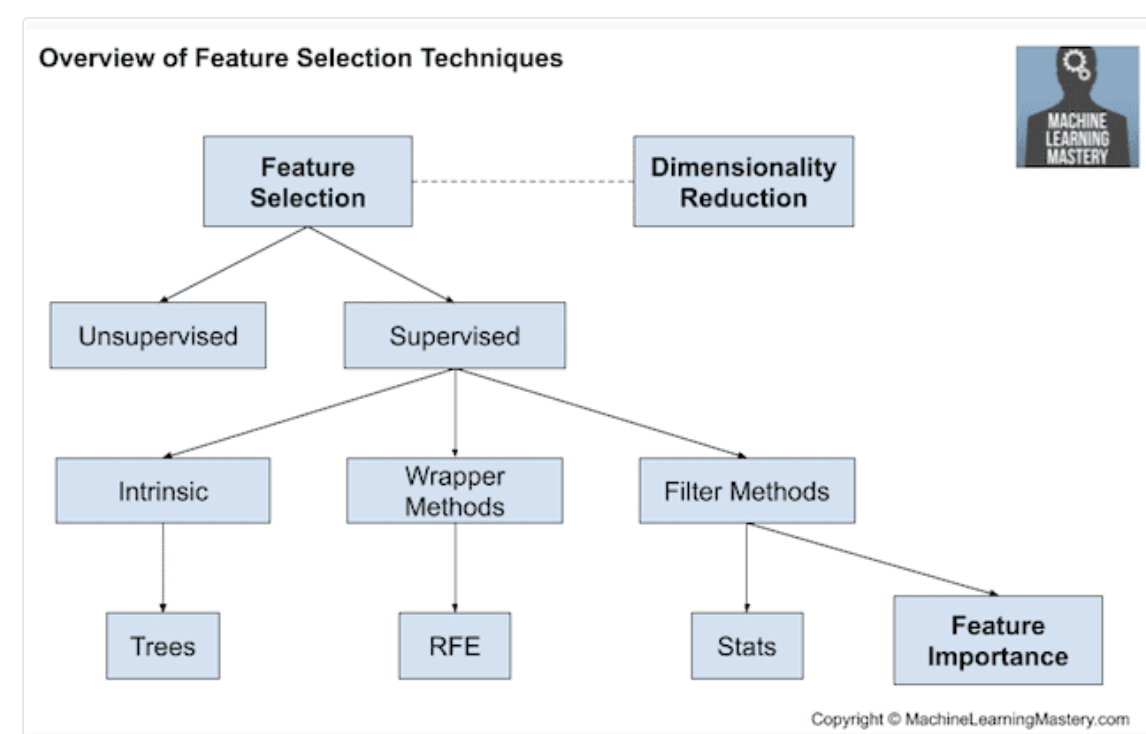


**Things to discuss:**
1. for why/why not? --> should i get the feature importance from the classfiication mdoel first then if one of the columns are inside, then I do a further analysis to it --> this means don't really need to deal to with all the non-cat stuff
2. There is column fro recommendations: "briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees."

### Correlation
Correlation is a simple approach to find **linear dependency** between features.

- If correlation == -1 / 1 - two features have linear dependence
- If correlation == 0 - two features have not linear dependence

#### Label Encoding

In [58]:
# corr = prep_data.corr(method='spearman')

# mask = np.zeros_like(corr, dtype=bool)
# mask[np.triu_indices_from(mask)] = True
# f, ax = plt.subplots(figsize=(15, 15))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
# plt.show()

In [59]:
prep_data.columns

Index(['did your previous employers provide resources to learn more about mental health disorders and how to seek help?_I Don't Know',
       'did your previous employers provide resources to learn more about mental health disorders and how to seek help?_No',
       'did your previous employers provide resources to learn more about mental health disorders and how to seek help?_Some',
       'did your previous employers provide resources to learn more about mental health disorders and how to seek help?_Yes',
       'have you had a mental health disorder in the past?_I Don't Know',
       'have you had a mental health disorder in the past?_No',
       'have you had a mental health disorder in the past?_Yes',
       'does your employer offer resources to learn more about mental health disorders and options for seeking help?_I Don't Know',
       'does your employer offer resources to learn more about mental health disorders and options for seeking help?_No',
       'does your employer off

Correlation for **'do you currently have a mental health disorder?'** column

In [60]:
# f, ax = plt.subplots(figsize=(25, 1))

# treatment = corr.sort_values(by=['do you currently have a mental health disorder?_Yes'], ascending=False).head(1).T
# treatment = treatment.sort_values(by=['do you currently have a mental health disorder?_Yes'],ascending=False).T
# sns.heatmap(treatment, cmap=cmap, annot=True)
# plt.show()

#### Ordinal Encoding [encode based on unique values of each column]

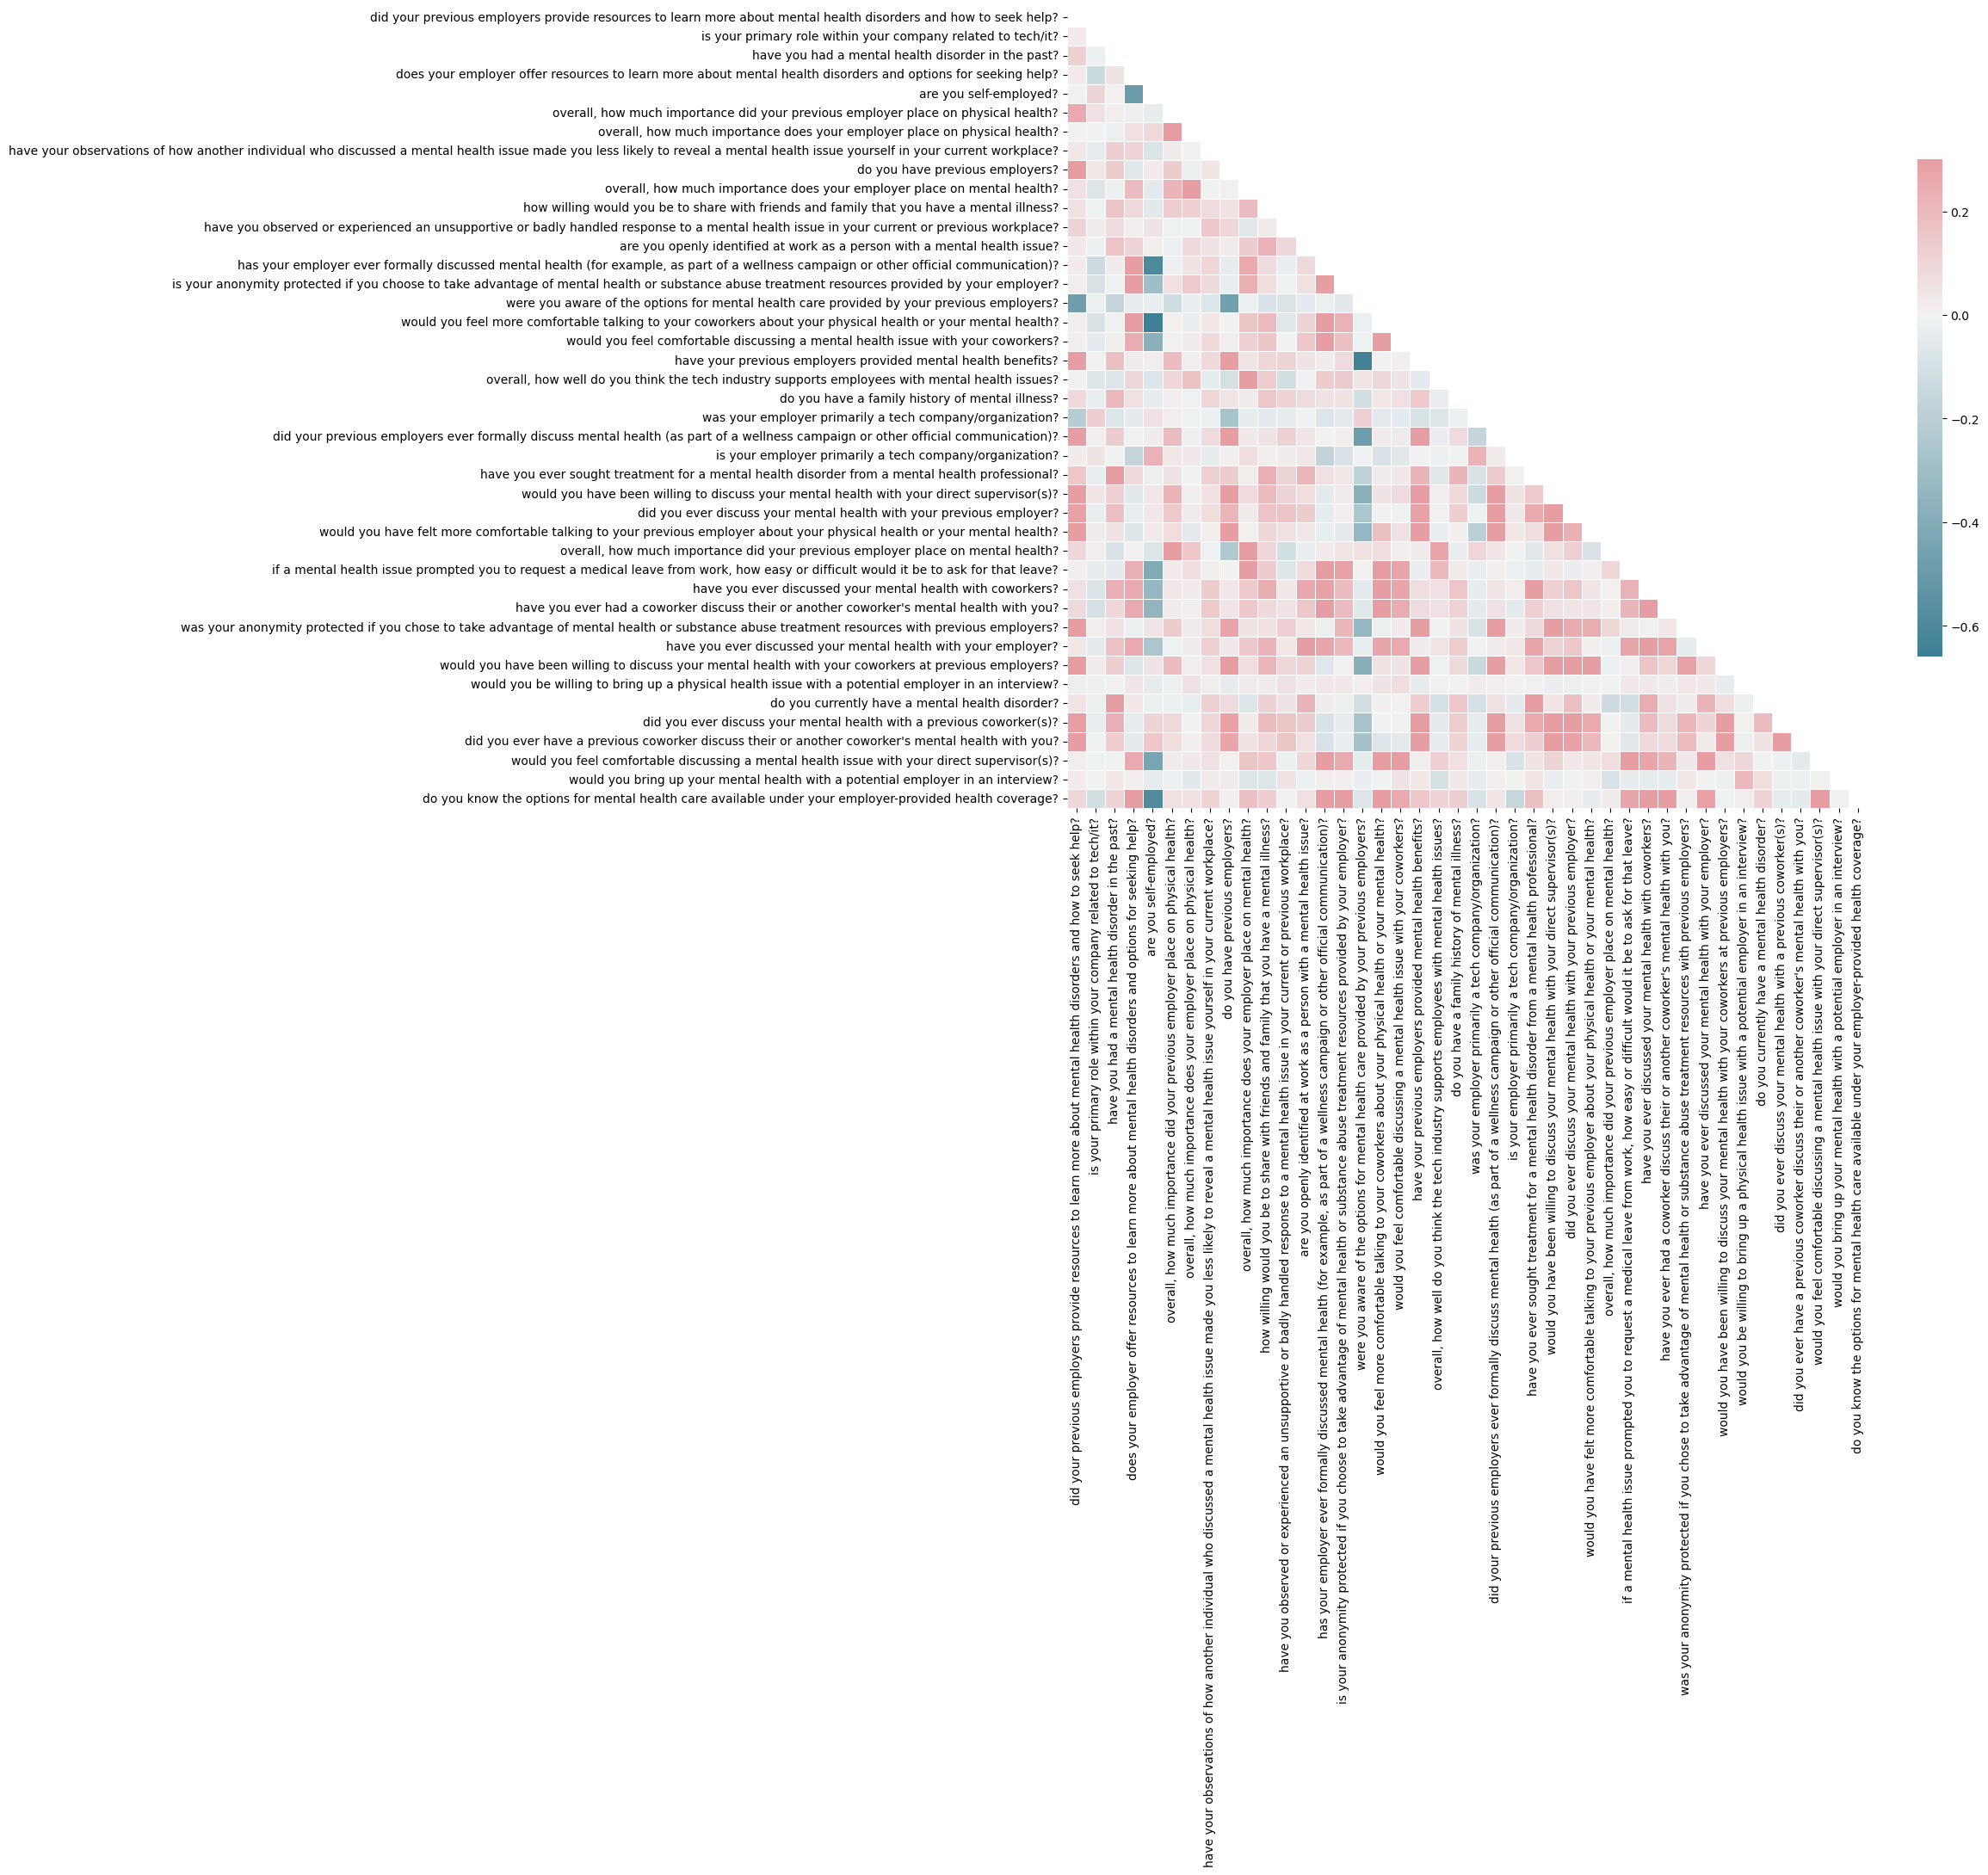

In [61]:
corr2 = prep_data_ordinal_df.corr(method='spearman')

mask = np.zeros_like(corr2, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Correlation for **'do you currently have a mental health disorder?'** column

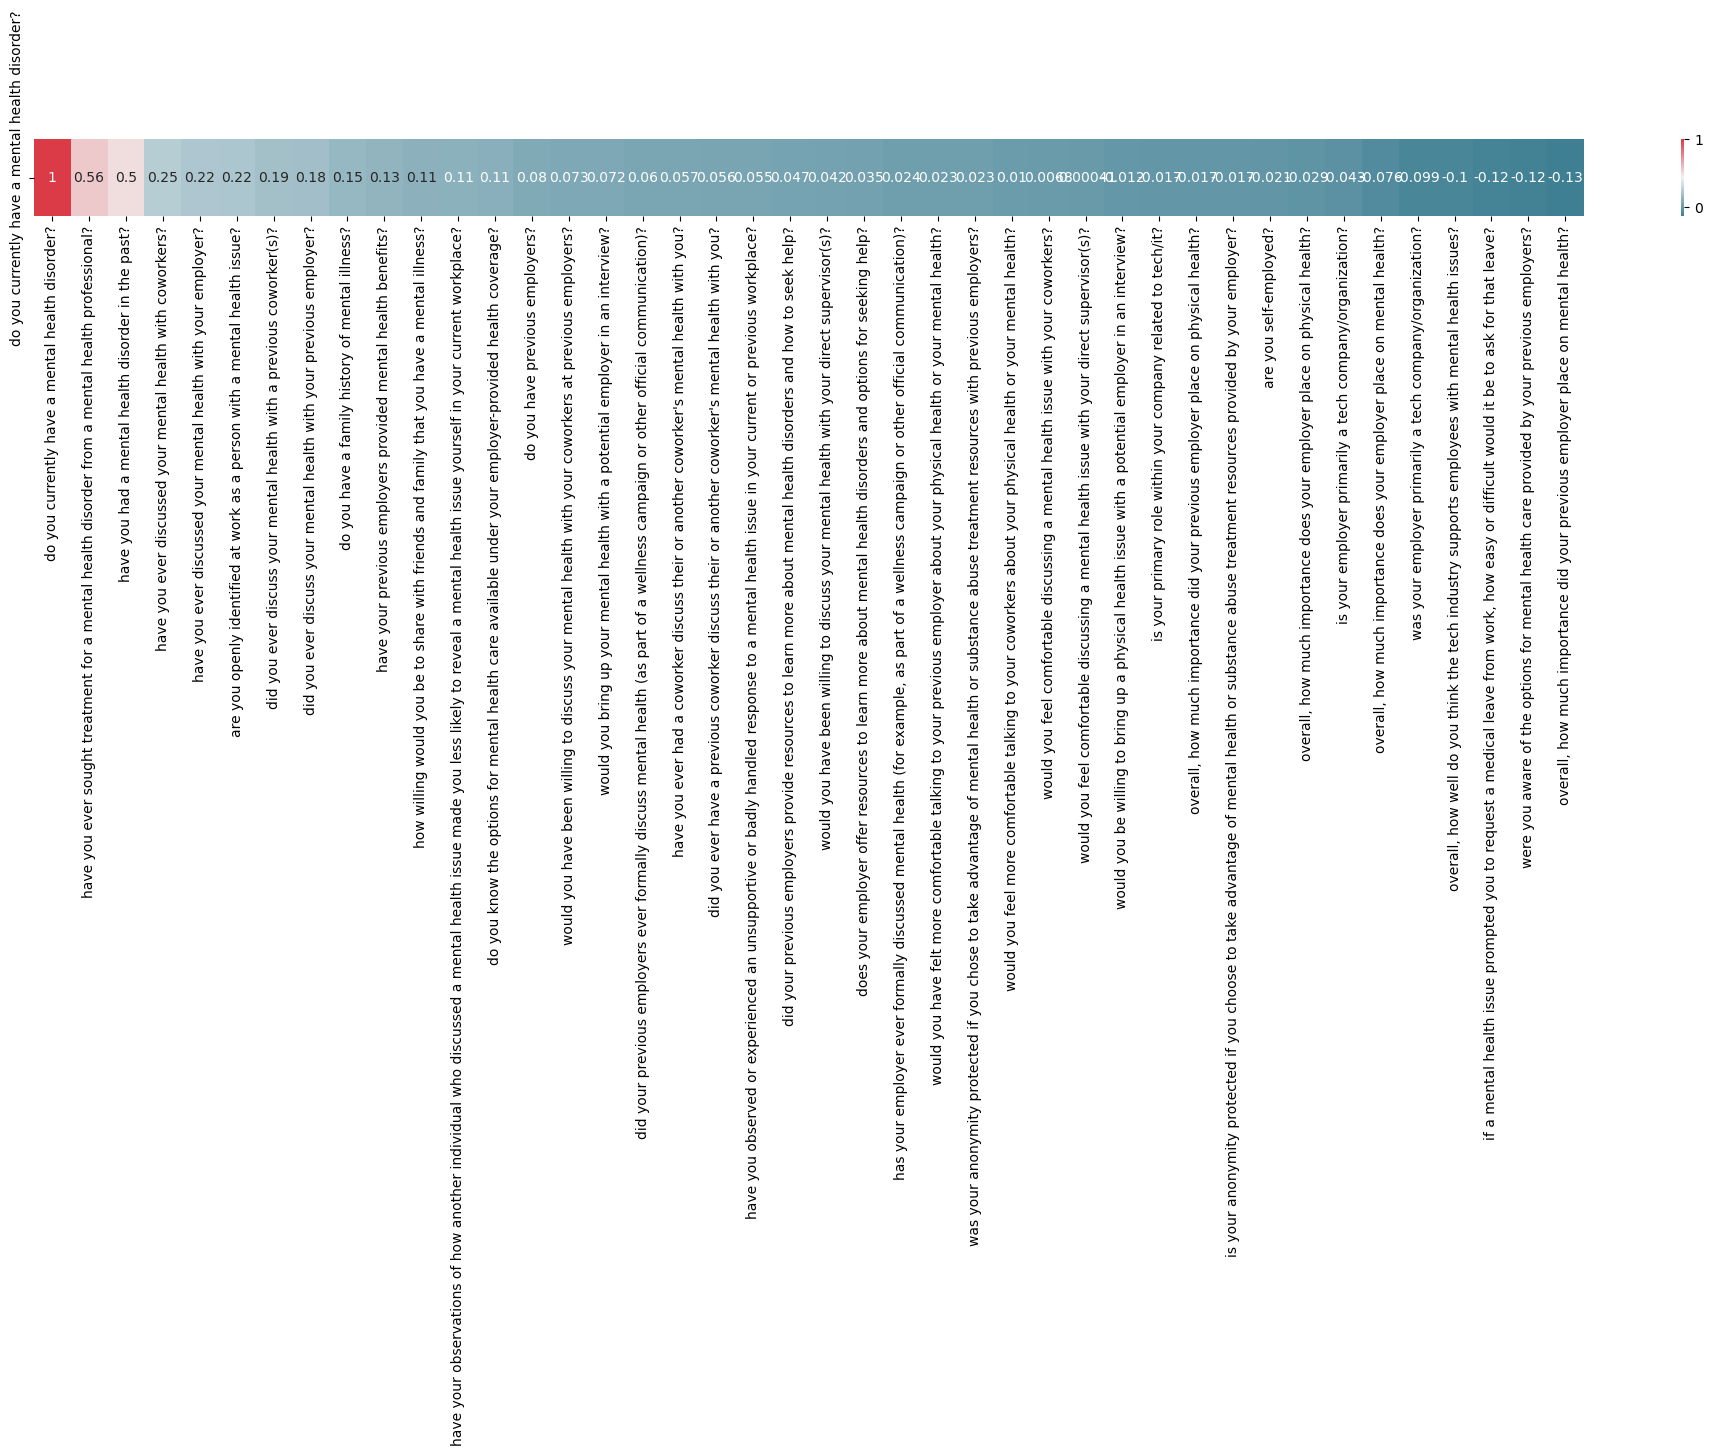

In [62]:
f, ax = plt.subplots(figsize=(25, 1))

treatment = corr2.sort_values(by=['do you currently have a mental health disorder?'], ascending=False).head(1).T
treatment = treatment.sort_values(by=['do you currently have a mental health disorder?'],ascending=False).T
sns.heatmap(treatment, cmap=cmap, annot=True)
plt.show()

In [63]:
# From the above correlation graph
ten_corr_features = ['have you ever sought treatment for a mental health disorder from a mental health professional?',
                     'have you had a mental health disorder in the past?',
                     'have you ever discussed your mental health with coworkers?',
                     'are you openly identified at work as a perso with a mental health issue?',
                     'did you ever discuss your mental health with your previous employer?',
                     'do you have a family history of mental illness?',
                     'have your previous employers provided mental health benefits?',
                     'overall, how much importance did your previous employer place on mental health?',
                     'were you aware of the options for mental health care provided by your previous employers?',
                     'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']

print('Top 10 features: \n', ten_corr_features)

Top 10 features: 
 ['have you ever sought treatment for a mental health disorder from a mental health professional?', 'have you had a mental health disorder in the past?', 'have you ever discussed your mental health with coworkers?', 'are you openly identified at work as a perso with a mental health issue?', 'did you ever discuss your mental health with your previous employer?', 'do you have a family history of mental illness?', 'have your previous employers provided mental health benefits?', 'overall, how much importance did your previous employer place on mental health?', 'were you aware of the options for mental health care provided by your previous employers?', 'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']


### Chi-2 [only for categorical variables]
Checks if there is a significant difference between the observed and expected frequencies of two categorical numbers. Thus, the null hypothesis that there is no relationship between the variables is tested:

𝑋2=(Observed frequency−Expected frequency)2Expected frequency

I want to use top-10 features:


#### Label Encoding

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

features_norm = MinMaxScaler().fit_transform(prep_cat_data.drop(['do you currently have a mental health disorder?_Yes'], axis=1))
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(features_norm, prep_cat_data['do you currently have a mental health disorder?_Yes'])

chi_support = chi_selector.get_support()
chi_feature = prep_cat_data.drop(['do you currently have a mental health disorder?_Yes'], axis=1).loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

10 selected features


In [65]:
for each in chi_feature:
  print(each + '\n')

have you had a mental health disorder in the past?_No

have you had a mental health disorder in the past?_Yes

have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?_No

do you have a family history of mental illness?_No

do you have a family history of mental illness?_Yes

do you currently have a mental health disorder?_No

are you openly identified at work as a person with a mental health issue?

have you ever sought treatment for a mental health disorder from a mental health professional?

have you ever discussed your mental health with coworkers?

have you ever discussed your mental health with your employer?



#### Ordinal Encoding

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

features_norm = MinMaxScaler().fit_transform(prep_data_ordinal_df.drop(['do you currently have a mental health disorder?'], axis=1))
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(features_norm, prep_data_ordinal_df['do you currently have a mental health disorder?'])

chi_support = chi_selector.get_support()
chi_feature = prep_data_ordinal_df.drop(['do you currently have a mental health disorder?'], axis=1).loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

for each in chi_feature:
  print(each + '\n')

10 selected features
have you had a mental health disorder in the past?

have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?

are you openly identified at work as a person with a mental health issue?

were you aware of the options for mental health care provided by your previous employers?

have your previous employers provided mental health benefits?

have you ever sought treatment for a mental health disorder from a mental health professional?

did you ever discuss your mental health with your previous employer?

have you ever discussed your mental health with coworkers?

have you ever discussed your mental health with your employer?

did you ever discuss your mental health with a previous coworker(s)?



### RFE (recursive feature removal)

#### Ordinal Encoding

In [67]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(features_norm ,prep_data_ordinal_df['do you currently have a mental health disorder?'])

Fitting estimator with 41 features.
Fitting estimator with 31 features.
Fitting estimator with 21 features.
Fitting estimator with 11 features.


RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)

In [68]:
rfe_support = rfe_selector.get_support()
rfe_features = prep_data_ordinal_df.drop(['do you currently have a mental health disorder?'], axis=1).loc[:,rfe_support].columns.tolist()

for each in rfe_features:
  print(each + '\n')

have you had a mental health disorder in the past?

are you self-employed?

overall, how much importance does your employer place on mental health?

are you openly identified at work as a person with a mental health issue?

have you ever sought treatment for a mental health disorder from a mental health professional?

would you have been willing to discuss your mental health with your direct supervisor(s)?

overall, how much importance did your previous employer place on mental health?

if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?

have you ever discussed your mental health with coworkers?

have you ever discussed your mental health with your employer?



### Relief
This method samples randomly instances from the dataset and updates the relevance of each feature based on the difference between the selected instance and the two nearest instances of the same and opposite classes. If a feature difference is observed in the neighboring instances of the same class ( a ‘hit’), the feature score decreases, alternatively if the feature value difference is observed with a different score (a ‘miss’) then the feature score increases.


The extended algorithm, ReliefF applies feature weighting and searches for more nearest neighbors.

**Rationale:** a feature that is consistently similar among instances of the same class but different among instances of different classes is likely to be relevant for classfication tasks

#### Ordinal Encoding

In [69]:
! pip install ReliefF

Defaulting to user installation because normal site-packages is not writeable


In [70]:
from ReliefF import ReliefF

fs = ReliefF(n_neighbors=1, n_features_to_keep=10)
features = fs.fit_transform(prep_data_ordinal_df.drop(['do you currently have a mental health disorder?'], axis=1).to_numpy(), prep_data_ordinal_df['do you currently have a mental health disorder?'].to_numpy()).T

In [71]:
columns = prep_data_ordinal_df.drop(['do you currently have a mental health disorder?'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (prep_data_ordinal_df.drop(['do you currently have a mental health disorder?'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-10 features: \n', reliefF_features)

Top-10 features: 
 ['have you had a mental health disorder in the past?', 'have you ever sought treatment for a mental health disorder from a mental health professional?', 'do you have previous employers?', 'are you self-employed?', 'is your primary role within your company related to tech/it?', 'was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?', 'do you have a family history of mental illness?', 'have you ever discussed your mental health with your employer?', 'would you feel comfortable discussing a mental health issue with your coworkers?', 'is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?']


### Comparing the different feature selection methods used


In [72]:
feature_names = pd.DataFrame({'features': columns})
feature_names = feature_names.set_index('features')
feature_names['correlation'] = np.nan
feature_names['chi_2'] = np.nan
feature_names['rfe'] = np.nan
feature_names['reliefF'] = np.nan

In [73]:
def is_important_feature(feature, features_list):
    return feature in features_list

In [74]:
feature_names['correlation'] = feature_names.index.map(lambda feature: is_important_feature(feature, ten_corr_features))
feature_names['chi_2'] = feature_names.index.map(lambda feature: is_important_feature(feature, chi_feature))
feature_names['rfe'] = feature_names.index.map(lambda feature: is_important_feature(feature, rfe_features))
feature_names['reliefF'] = feature_names.index.map(lambda feature: is_important_feature(feature, reliefF_features))

In [75]:
feature_names

correlation  chi_2    rfe  \
features                                                                        
did your previous employers provide resources t...        False  False  False   
is your primary role within your company relate...        False  False  False   
have you had a mental health disorder in the past?         True   True   True   
does your employer offer resources to learn mor...        False  False  False   
are you self-employed?                                    False  False   True   
overall, how much importance did your previous ...        False  False  False   
overall, how much importance does your employer...        False  False  False   
have your observations of how another individua...        False   True  False   
do you have previous employers?                           False  False  False   
overall, how much importance does your employer...        False  False   True   
how willing would you be to share with friends ...        False  False  False   
have you observed or experienced an unsupportiv...        False  False  False   
are you openly identified at work as a person w...        False   True   True   
has your employer ever formally discussed menta...        False  False  False   
is your anonymity protected if you choose to ta...        False  False  False   
were you aware of the options for mental health...         True   True  False   
would you feel more comfortable talking to your...        False  False  False   
would you feel comfortable discussing a mental ...        False  False  False   
have your previous employers provided mental he...         True   True  False   
overall, how well do you think the tech industr...        False  False  False   
do you have a family history of mental illness?            True  False  False   
was your employer primarily a tech company/orga...        False  False  False   
did your previous employers ever formally discu...        False  False  False   
is your employer primarily a tech company/organ...        False  False  False   
have you ever sought treatment for a mental hea...         True   True   True   
would you have been willing to discuss your men...        False  False   True   
did you ever discuss your mental health with yo...         True   True  False   
would you have felt more comfortable talking to...        False  False  False   
overall, how much importance did your previous ...         True  False   True   
if a mental health issue prompted you to reques...         True  False   True   
have you ever discussed your mental health with...         True   True   True   
have you ever had a coworker discuss their or a...        False  False  False   
was your anonymity protected if you chose to ta...        False  False  False   
have you ever discussed your mental health with...        False   True   True   
would you have been willing to discuss your men...        False  False  False   
would you be willing to bring up a physical hea...        False  False  False   
did you ever discuss your mental health with a ...        False   True  False   
did you ever have a previous coworker discuss t...        False  False  False   
would you feel comfortable discussing a mental ...        False  False  False   
would you bring up your mental health with a po...        False  False  False   
do you know the options for mental health care ...        False  False  False   

                                                    reliefF  
features                                                     
did your previous employers provide resources t...    False  
is your primary role within your company relate...     True  
have you had a mental health disorder in the past?     True  
does your employer offer resources to learn mor...    False  
are you self-employed?                                 True  
overall, how much importance did your previous ...    False  
overall, how much importance does your employer...    False  
have your 

C:\Users\Lim Yin Yao\AppData\Local\Temp\ipykernel_17292\3809849010.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='features', y='is_important', data=true_counts_sorted, palette="ch:.25")
C:\Users\Lim Yin Yao\AppData\Local\Temp\ipykernel_17292\3809849010.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


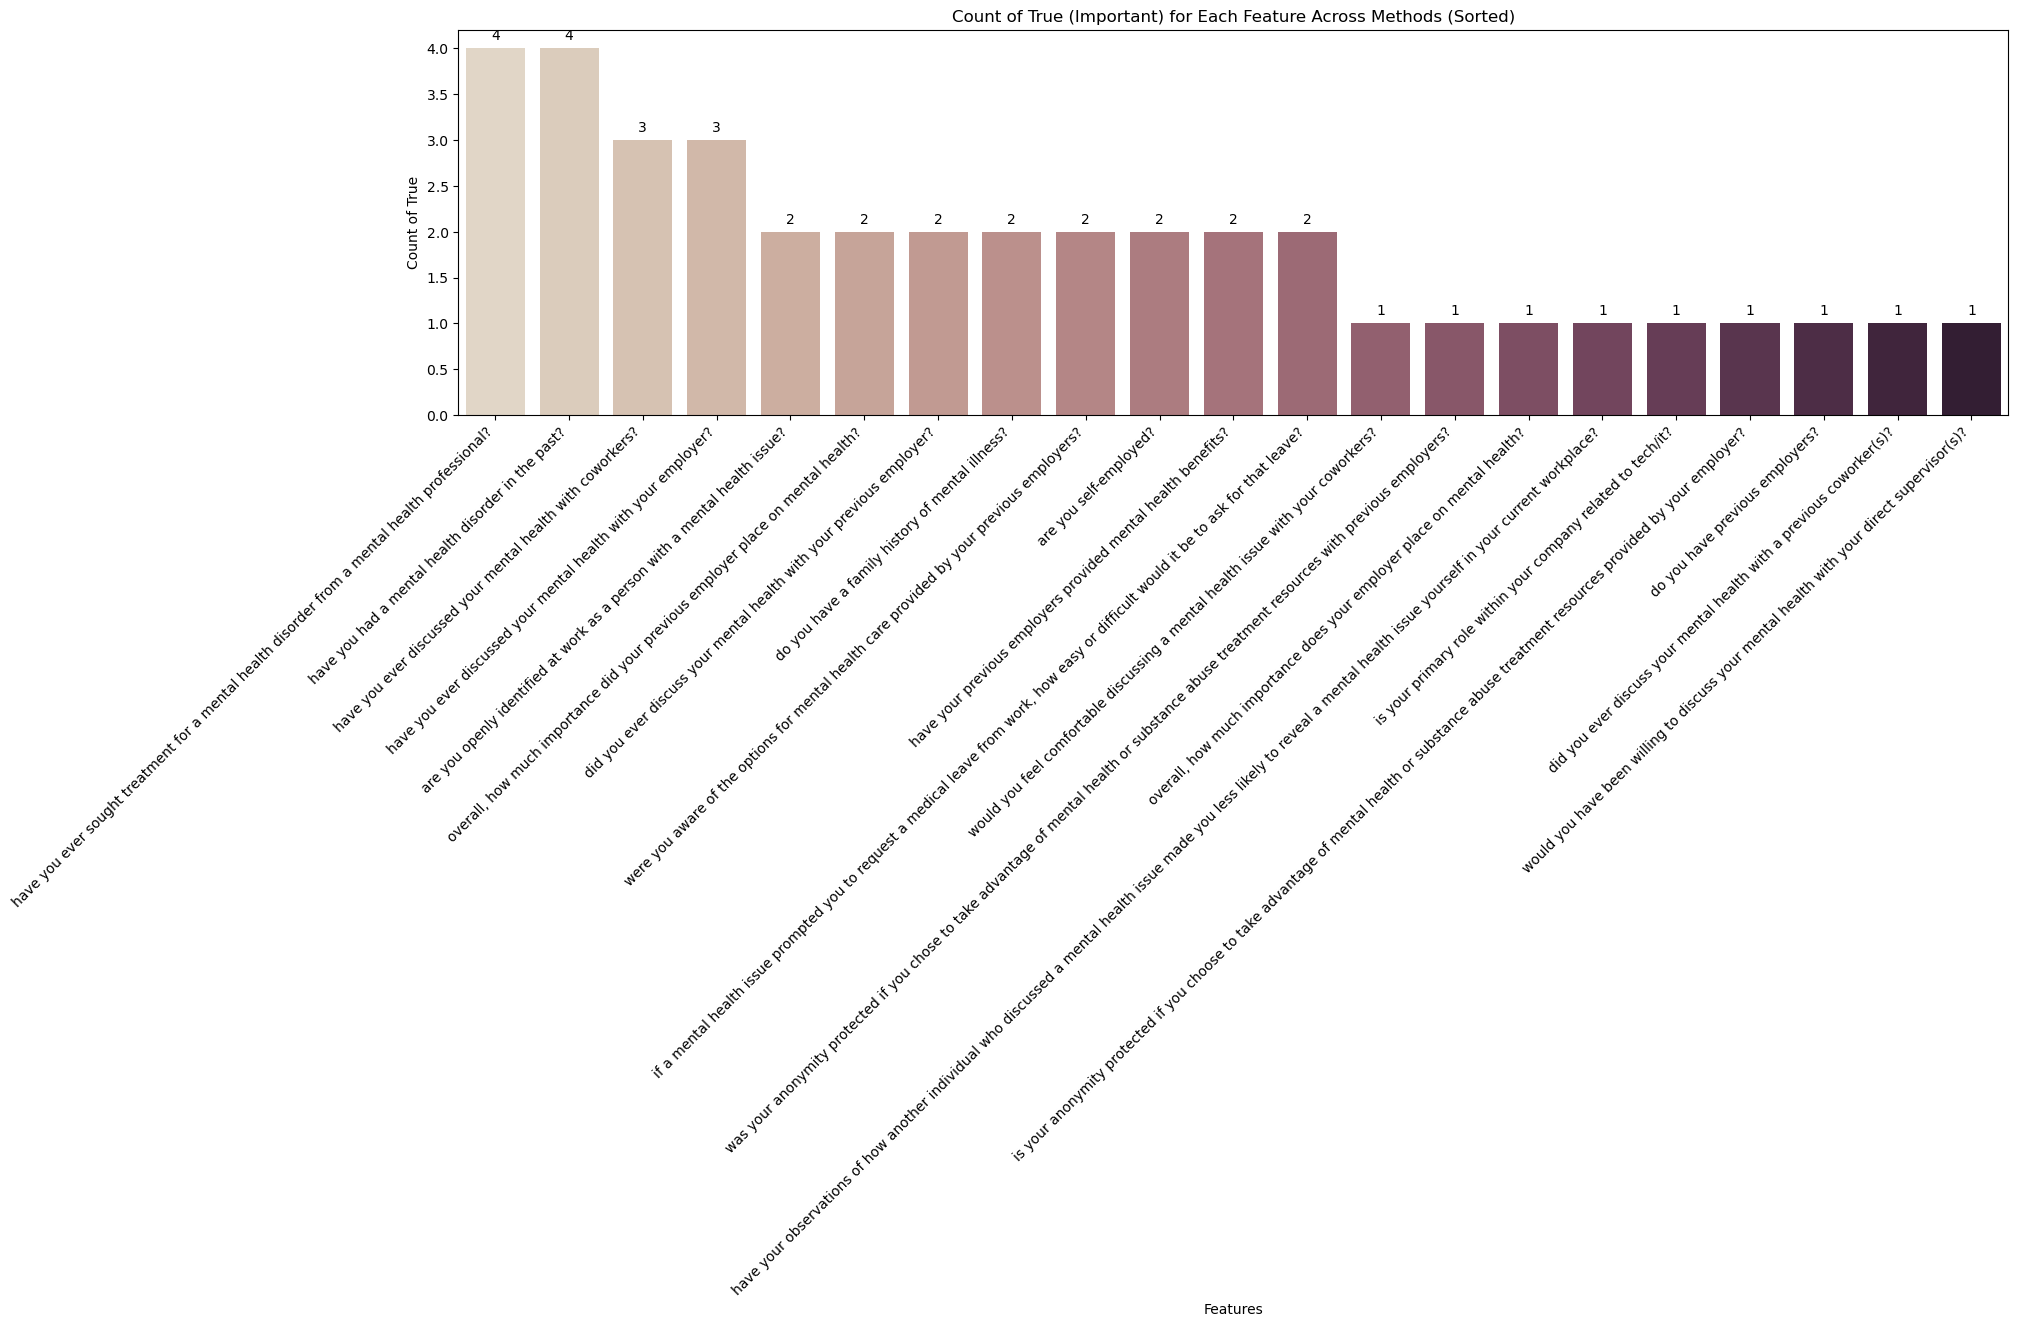

In [76]:
#  Melt the DataFrame to long format
long_df = feature_names.reset_index().melt(id_vars='features', value_vars=['correlation', 'chi_2', 'rfe', 'reliefF'],
                                           var_name='method', value_name='is_important')

# Filter for True values only
true_df = long_df[long_df['is_important'] == True]

# Aggregate counts by feature
true_counts = true_df.groupby('features').count()['is_important'].reset_index()

# Sort the counts of True values in descending order
true_counts_sorted = true_counts.sort_values(by='is_important', ascending=False)

# Plotting
plt.figure(figsize=(20, 5))
ax = sns.barplot(x='features', y='is_important', data=true_counts_sorted, palette="ch:.25")

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Improve readability of x-tick labels
plt.xticks(rotation=45, ha="right")
plt.title('Count of True (Important) for Each Feature Across Methods (Sorted)')
plt.ylabel('Count of True')
plt.xlabel('Features')

plt.tight_layout()
plt.show()


#### Important features with count = 4 , 3

In [77]:
# import plotly.express as px


# fig = px.parallel_categories(compiled_df[['do you currently have a mental health disorder?', 'have you had a mental health disorder in the past?', 'have you ever sought treatment for a mental health disorder from a mental health professional?',
#                                    'have you ever discussed your mental health with coworkers?' , 'have you ever discussed your mental health with your employer?']])
# fig.show()

## NLP Model
- To deal with unstructured Data

In [104]:
## Get all the unstructured data together as a dataframe
text_columns = ['why or why not?', 'briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.', 'why or why not?.1']

# Create a new DataFrame that contains only the columns with unstructured text
unstructured_text_df = compiled_df[text_columns].copy()
pd.set_option('display.max_colwidth', None)  # None means unlimited width

unstructured_text_df.head()
unstructured_text_df['briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.'].head(10)


0                                                                                                                                                                  They don't take it seriously
1                                                                                                                                           raise awareness, talk about it to lessen the stigma
2                                                                                                           Education and awareness, statistics, add supportive writing to the company handbook
3                                                                                                                                                  More support, less burnout and death marches
4                                                                                                            I think tech is more internal and they don't really talk about feelings or issues.
5                                       

#### Pre-Process the text data
- Lower case
- Tokenization(At yy part)
- Remove Stop Words
- Lemmatization / Stemming (reduce to base/root form)
- Expand contractions

In [79]:
!pip install nltk
!pip install contractions

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [80]:
import re
import nltk
import contractions
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [81]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
# Function to map NLTK's POS tags to the format wordnet lemmatizer would accept
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Function to lemmatize text based on POS tagging
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Function to remove special characters
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text

# Function to remove stopwords
def remove_stopwords(text, is_lower_case=False):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop_words]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Main function to normalize corpus
def normalize_corpus(corpus, text_lower_case=True, text_lemmatization=True,
                     special_char_removal=True, stopword_removal=True,
                     remove_digits=True, expand_contractions=True):
    normalized_corpus = []
    for doc in corpus:
        # Expand contractions
        if expand_contractions:
            doc = contractions.fix(doc)
        # Convert to lowercase
        if text_lower_case:
            doc = doc.lower()
        # Replace newlines and such with spaces
        doc = re.sub(r'[\r|\n|\r\n]+', ' ', doc)
        # Lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # Remove special characters and/or digits
        if special_char_removal:
            doc = remove_special_characters(doc, remove_digits=remove_digits)
        # Ensure single spaces between words
        doc = re.sub(' +', ' ', doc)
        # Remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        normalized_corpus.append(doc)
    return normalized_corpus

# Example of normalizing a single column dataframe
def normalize_corpus_df(df, columns):
    processed_df = pd.DataFrame()
    for column in columns:
        processed_column_name = f'{column}'
        processed_df[processed_column_name] = df[column].apply(lambda x: normalize_corpus([x])[0] if pd.notnull(x) else x)
    return processed_df


processed_text_df = normalize_corpus_df(unstructured_text_df, text_columns)
processed_text_df

why or why not?  \
0                                                   NaN   
1          may require specific measure accomodate need   
2     sometimes bring psoriasis explanation flare we...   
3              anything may hurt chance hire go provide   
4     depends something start interview get job firs...   
...                                                 ...   
2001                would bring need sort accomodations   
2002          depends may applicable consider need know   
2003  depend job physical issue may affect work woul...   
2004  interested hire want know make best decision b...   
2005             generally irrelevant work work mention   

     briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.  \
0                                        take seriously                                                                                  
1                    raise awareness talk lessen stigma                                                                                  
2     education awareness statistic add supportive w...                                                                                  
3                      support less burnout death march                                                                                  
4         think tech internal really talk feeling issue                                                                                  
...                                                 ...                                                                                  
2001  hard sure strike balance supportive comfortabl...                                                                                  
2002  lot rhetoric around mental health de general e...                                                                                  
2003  open upfront mental health time oppose serious...                                                                                  
2004  alot medium noise general experience people in...                                                                                  
2005  discus openly allow people work autonomously w...                                                                                  

                                      why or why not?.1  
0                              would worried would hire  
1     mental health issue stigmatise misunderstood many  
2                                                stigma  
3                                     might hurt chance  
4               think connect job like salary get offer  
...                                                 ...  
2001                                 nervous would hire  
2002  discriminate fire penalize people weaponize an...  
2003  mental health still stigma lot people especial...  
2004                                see answer physical  
2005                             think would deter hire  

[1821 rows x 3 columns]

In [106]:
processed_text_df.head(8)

why or why not?  \
0                                                                                      NaN   
1                                             may require specific measure accomodate need   
2                                sometimes bring psoriasis explanation flare wear hat time   
3                                                 anything may hurt chance hire go provide   
4                                    depends something start interview get job first share   
5                                                                             would depend   
6                                                              seem like would distraction   
7  want maintain privacy unless end physical health issue would affect work think business   

  briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.  \
0                                                                                                                    take seriously   
1                                                                                                raise awareness talk lessen stigma   
2                                                               education awareness statistic add supportive write company handbook   
3                                                                                                  support less burnout death march   
4                                                                                     think tech internal really talk feeling issue   
5                                                                                        awareness change work schedule expectation   
6                                                                           vocal support employee issue support mental health time   
7                                                    think work expect everyone connect time human meant work degree need cut slack   

                                   why or why not?.1  
0                           would worried would hire  
1  mental health issue stigmatise misunderstood many  
2                                             stigma  
3                                  might hurt chance  
4            think connect job like salary get offer  
5                                    would feel safe  
6               would worried would affect interview  
7                                      none business

In [84]:
# split the df into 3 different df

# Replace NaN values with an empty string
briefly_df = processed_text_df['briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.'].fillna("").to_frame(name='processed_text')
briefly_df2 = processed_text_df['briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.'].fillna("").to_frame(name='processed_text')


#### K-Means Clustering(YY)

##### Installation and Imports

In [85]:
#Installation required
!pip install wordcloud matplotlib
!pip install gensim
!pip install pyLDAvis==3.4.1


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [86]:
# Importation required
import matplotlib.pyplot as plt
import gensim
import gensim.corpora as corpora
import pyLDAvis.gensim
import pyLDAvis


from wordcloud import WordCloud
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from math import ceil

In [87]:
print(pd. __version__)

2.1.1


##### Word Cloud

C:\Users\Lim Yin Yao\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Lim Yin Yao\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\Lim Yin Yao\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\Lim Yin Yao\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientatio

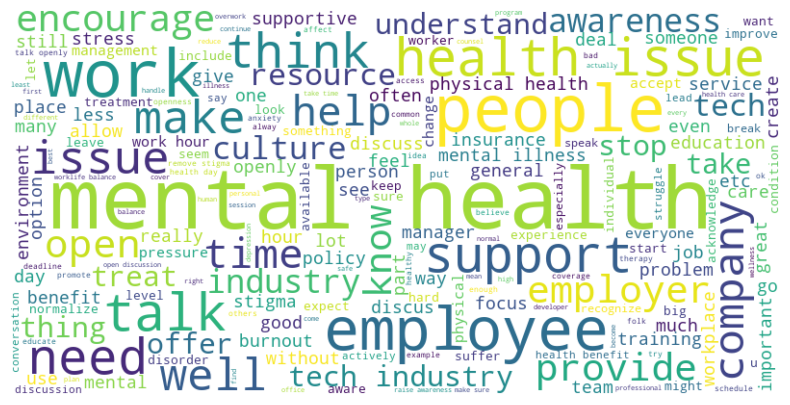

In [88]:

text_combined = " ".join(briefly_df2['processed_text'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text_combined)

# Display the generated WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


##### Frequency Plot

In [107]:
# Tokenize the strings in 'processed_text' into lists of words
briefly_df2['Tokenised Content'] = briefly_df2['processed_text'].apply(lambda x: x.split())

briefly_df2['Tokenised Content'].head(8)


0                                                                               [take, seriously]
1                                                        [raise, awareness, talk, lessen, stigma]
2                    [education, awareness, statistic, add, supportive, write, company, handbook]
3                                                          [support, less, burnout, death, march]
4                                           [think, tech, internal, really, talk, feeling, issue]
5                                                [awareness, change, work, schedule, expectation]
6                                [vocal, support, employee, issue, support, mental, health, time]
7    [think, work, expect, everyone, connect, time, human, meant, work, degree, need, cut, slack]
Name: Tokenised Content, dtype: object

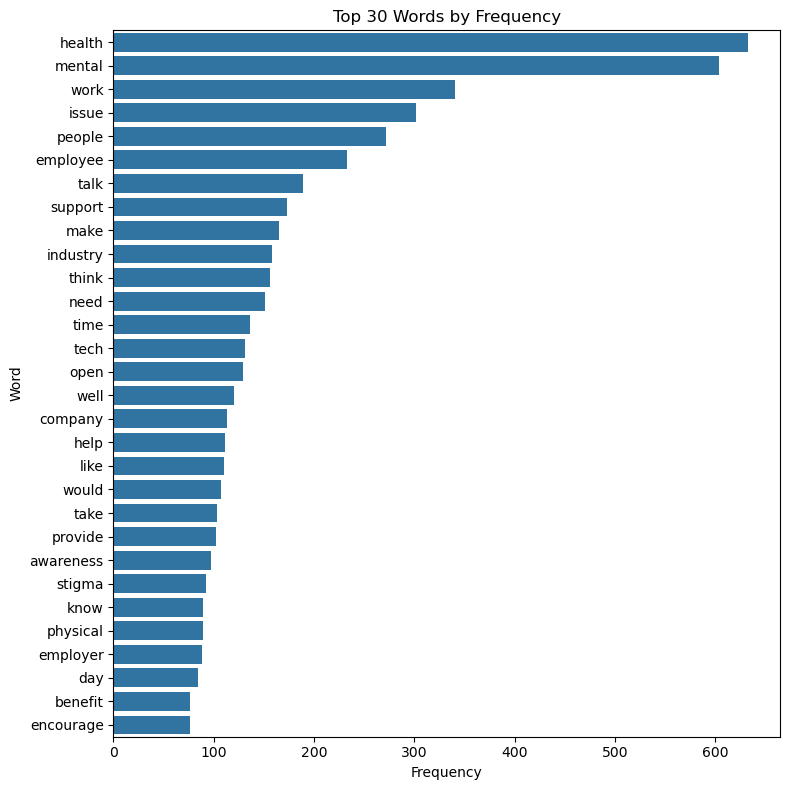

In [90]:

# Aggregate tokens into a single list
new_tokens = []
for tokens in briefly_df2['Tokenised Content'].tolist():
    new_tokens += tokens

# Count the frequency of each word
counted_words = Counter(new_tokens)

# Create a DataFrame from the counted words
word_frequency = pd.DataFrame(counted_words.items(), columns=['word', 'frequency']).sort_values(by="frequency", ascending=False)

# Generate the frequency chart for the top 30 words
plt.figure(figsize=(8, 8))
sns.barplot(x='frequency', y='word', data=word_frequency.head(30))
plt.title('Top 30 Words by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()


##### Topic Modelling for Text

In [91]:
# Create Dictionary
id2word = corpora.Dictionary(briefly_df2['Tokenised Content'])

# Filter out tokens that appear in only 1 documents and appear in more than 90% of the documents
id2word.filter_extremes(no_below=20, no_above=0.80)

# Create Corpus
texts = briefly_df2['Tokenised Content']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Create a dictionary representation of the documents. Each word gets an id
print('Sample word to id mappings:\n', list(id2word.items())[:50])
print()
print('Total Vocabulary Size:', len(id2word))

Sample word to id mappings:
 [(0, 'take'), (1, 'awareness'), (2, 'stigma'), (3, 'talk'), (4, 'company'), (5, 'education'), (6, 'supportive'), (7, 'burnout'), (8, 'less'), (9, 'support'), (10, 'issue'), (11, 'really'), (12, 'tech'), (13, 'think'), (14, 'change'), (15, 'schedule'), (16, 'work'), (17, 'employee'), (18, 'health'), (19, 'mental'), (20, 'time'), (21, 'everyone'), (22, 'expect'), (23, 'need'), (24, 'open'), (25, 'stop'), (26, 'worker'), (27, 'aware'), (28, 'deal'), (29, 'depression'), (30, 'job'), (31, 'lot'), (32, 'make'), (33, 'might'), (34, 'option'), (35, 'people'), (36, 'problem'), (37, 'program'), (38, 'someone'), (39, 'stress'), (40, 'also'), (41, 'important'), (42, 'sick'), (43, 'treatment'), (44, 'workplace'), (45, 'offer'), (46, 'service'), (47, 'actively'), (48, 'available'), (49, 'discuss')]

Total Vocabulary Size: 156


##### Building LDA Model

Hyper parameter Tuning(LDA)
- Coherence Score measures how much the topics generated by the LDA model make sense. Higher coherence scores indicate that the words in each topic frequently appear together in the documents, making the topics more interpretable and meaningful.
- Perplexity is a measure of how well the probability distribution of the model predicts a sample. In topic modeling, lower perplexity might indicate better model performance, but it's not always the best indicator of the human interpretability of the topics.

In [92]:
# def compute_evaluation_values(corpus, dictionary, k, texts):
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                             id2word=dictionary,
#                                             num_topics=k, 
#                                             random_state=random_state,
#                                             chunksize=chunksize,
#                                             passes=passes,
#                                             per_word_topics=per_word_topics)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
#     perplexity = lda_model.log_perplexity(corpus)
    
#     return [coherence_model_lda.get_coherence(), perplexity]

# random_state = 100
# chunksize=100
# passes=40
# per_word_topics=True
# texts = briefly_df2['Tokenised Content'].tolist()  # Ensure this is a list of lists of tokens

# topic_param = []
# coherence_score = []
# perplexity_score = []

# for k in range(2, 20):  # Experiment with a range of topics
#     print('Topic number:', k)
#     ev = compute_evaluation_values(corpus=corpus, dictionary=id2word, k=k, texts=texts)
#     coherence_score.append(ev[0])
#     perplexity_score.append(ev[1])
#     print('Coherence Score:', ev[0])
#     print('Perplexity Score:', ev[1])
#     print()
    
#     topic_param.append(k)

In [93]:
def compute_evaluation_values(corpus, dictionary, k, texts, random_state, chunksize, passes, per_word_topics, alphas, etas):
    results = []
    for alpha in alphas:
        for eta in etas:
            lda_model = gensim.models.LdaMulticore(corpus=corpus,
                id2word=dictionary,
                num_topics=k,
                random_state=random_state,
                chunksize=chunksize,
                passes=passes,
                alpha=alpha,
                eta=eta,
                per_word_topics=per_word_topics)
            
            # for coherence_model_type in ['u_mass', 'c_v', 'c_uci', 'c_npmi']:
            for coherence_model_type in ['c_v']:
                coherence_model_lda = CoherenceModel(model=lda_model, 
                texts=texts, dictionary=dictionary, coherence=coherence_model_type)
                coherence = coherence_model_lda.get_coherence()
                perplexity = lda_model.log_perplexity(corpus)
                results.append((k, alpha, eta, coherence_model_type, coherence, perplexity))
                
    # Convert results to DataFrame for easier analysis
    results_df = pd.DataFrame(results, columns=['Num Topics', 'Alpha', 'Eta', 'Coherence Model', 'Coherence', 'Perplexity'])
    return results_df

# Parameters setup
random_state = 100
chunksize = 100
passes = 40
per_word_topics = True
alphas = ['symmetric', 'asymmetric', 0.01]  
etas = ['auto', 0.01, 0.1]  
texts = briefly_df2['Tokenised Content'].tolist() 

# Initialization for plotting
topic_param = list(range(2, 20))  # Topics range
all_results = []

# Running the evaluation
for k in topic_param:
    print(f'Testing {k} topics...')
    results_df = compute_evaluation_values(
        corpus=corpus,
        dictionary=id2word,
        k=k,
        texts=texts,
        random_state=random_state,
        chunksize=chunksize,
        passes=passes,
        per_word_topics=per_word_topics,
        alphas=alphas,
        etas=etas)
    all_results.append(results_df)

# Concatenate all results
full_results_df = pd.concat(all_results, ignore_index=True)

# Find the best coherence score across all topics and configurations
best_coherence_row = full_results_df.loc[full_results_df['Coherence'].idxmax()]
print(f"Best Model Configuration:\n{best_coherence_row}\n")

Testing 2 topics...
Testing 3 topics...
Testing 4 topics...
Testing 5 topics...
Testing 6 topics...
Testing 7 topics...
Testing 8 topics...
Testing 9 topics...
Testing 10 topics...
Testing 11 topics...
Testing 12 topics...
Testing 13 topics...
Testing 14 topics...
Testing 15 topics...
Testing 16 topics...
Testing 17 topics...
Testing 18 topics...
Testing 19 topics...
Best Model Configuration:
Num Topics                  5
Alpha              asymmetric
Eta                      auto
Coherence Model           c_v
Coherence            0.474486
Perplexity           -4.78153
Name: 30, dtype: object



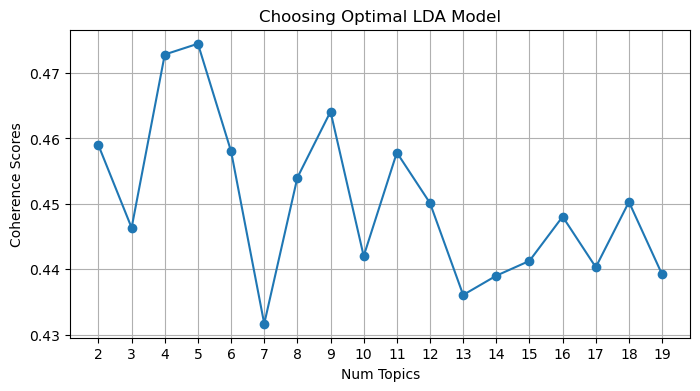

In [94]:
# Show graph
coherence_scores = full_results_df.groupby('Num Topics')['Coherence'].max().tolist()

plt.figure(figsize=(8,4))
plt.plot(topic_param, coherence_scores, marker='o')

plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Coherence Scores")
plt.xticks(topic_param) # Set x-axis ticks to whole numbers
plt.grid(True)
plt.show()
# We choose the highest coherence score reached before a major drop. K = 14
num_topics = 5


#### Final LDA Model

In [95]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                        id2word=id2word,
                        num_topics=num_topics,  # Set your optimal number of topics
                        random_state=random_state,
                        chunksize=chunksize,
                        passes=passes,
                        per_word_topics=per_word_topics,
                        alpha='asymmetric',
                        eta='auto')


# Print the keywords for the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.061*"talk" + 0.051*"open" + 0.039*"awareness" + 0.038*"support" + 0.036*"stigma" + 0.027*"work" + 0.026*"offer" + 0.026*"less" + 0.025*"provide" + 0.023*"people"


Topic: 1 
Words: 0.065*"people" + 0.052*"work" + 0.051*"industry" + 0.043*"think" + 0.042*"tech" + 0.038*"mental" + 0.032*"health" + 0.026*"issue" + 0.022*"would" + 0.022*"know"


Topic: 2 
Words: 0.096*"health" + 0.082*"mental" + 0.065*"make" + 0.039*"time" + 0.028*"encourage" + 0.028*"employee" + 0.025*"take" + 0.022*"openly" + 0.022*"insurance" + 0.019*"physical"


Topic: 3 
Words: 0.176*"health" + 0.144*"mental" + 0.084*"issue" + 0.053*"work" + 0.039*"take" + 0.035*"day" + 0.034*"physical" + 0.025*"well" + 0.022*"team" + 0.021*"employee"


Topic: 4 
Words: 0.083*"employee" + 0.070*"mental" + 0.061*"health" + 0.046*"like" + 0.043*"issue" + 0.039*"support" + 0.037*"employer" + 0.034*"understand" + 0.032*"company" + 0.029*"treat"




In [96]:
# Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=briefly_df2['Tokenised Content'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# Perplexity
perplexity_lda = lda_model.log_perplexity(corpus)
print('\nPerplexity: ', perplexity_lda)



Coherence Score:  0.47790464280987643

Perplexity:  -4.782773952956149


In [97]:
# Old lda model
# lda_model = LdaModel(corpus=corpus,
#                      id2word=id2word,
#                      num_topics=num_topics, 
#                      random_state=100,
#                      chunksize=100,
#                      passes=10,
#                      alpha='asymmetric',
#                      eta='auto')



In [110]:
def sort_and_limit_topics(corpus, model, limit):
    sorted_limited_topics = []
    for doc in corpus:
        doc_topics = model.get_document_topics(doc, minimum_probability=0.01)
        # Sort topics by relevance and limit to the top 'limit' topics
        doc_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)[:limit]
        sorted_limited_topics.append([topic[0] for topic in doc_topics])
    return sorted_limited_topics

# Apply the revised function with a limit of 3 topics per document
briefly_df2['Top Topics'] = sort_and_limit_topics(corpus, lda_model, limit=1)

# def sort_topics(corpus, model):
#     sorted_topics = []
#     for doc in corpus:
#         # Get document topics with a minimum probability threshold
#         doc_topics = model.get_document_topics(doc, minimum_probability=0.01)
#         # Sort topics by relevance (probability) without applying a limit
#         doc_topics_sorted = sorted(doc_topics, key=lambda x: x[1], reverse=True)
#         # Append the sorted topics (just the topic IDs) for each document
#         sorted_topics.append([topic[0] for topic in doc_topics_sorted])
#     return sorted_topics

# briefly_df2['Top Topics'] = sort_topics(corpus, lda_model)


# Define topic labels based on the keywords and themes identified 5 topics
topic_labels = {
    0: "Creating a Supportive Culture",
    1: "Industry-Specific Challenges and Opportunities",
    2: "Promoting Mental Health Practices",
    3: "Integrating Mental and Physical Health", # Meaning mental health as part of physical health
    4: "Employer-Employee Dynamics in Mental Health Support"
}

# 4 topics
# topic_labels = {
#     0: "Promoting Openness and Awareness",
#     1: "Industry Awareness and Personal Insight",
#     2: "Equating Mental and Physical Health",
#     3: "Work Environment and Work-Life Balance"
# }

# Replace topic numbers with labels for the limited set of topics
briefly_df2['Top Labeled Topics'] = briefly_df2['Top Topics'].apply(lambda topics: [topic_labels[topic] for topic in topics])

# Now, the DataFrame should have a more streamlined presentation of topics
(briefly_df2[['Tokenised Content', 'Top Labeled Topics']].head())
# (briefly_df2[['Tokenised Content', 'Top Topics']].head())



Tokenised Content  \
0                                                             [take, seriously]   
1                                      [raise, awareness, talk, lessen, stigma]   
2  [education, awareness, statistic, add, supportive, write, company, handbook]   
3                                        [support, less, burnout, death, march]   
4                         [think, tech, internal, really, talk, feeling, issue]   

                                 Top Labeled Topics  
0          [Integrating Mental and Physical Health]  
1                   [Creating a Supportive Culture]  
2                   [Creating a Supportive Culture]  
3                   [Creating a Supportive Culture]  
4  [Industry-Specific Challenges and Opportunities]

#### Visualization

C:\Users\Lim Yin Yao\AppData\Local\Temp\ipykernel_17292\3714054430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Counts', y='Dominant Topic', data=dominant_topic_counts, palette='viridis')


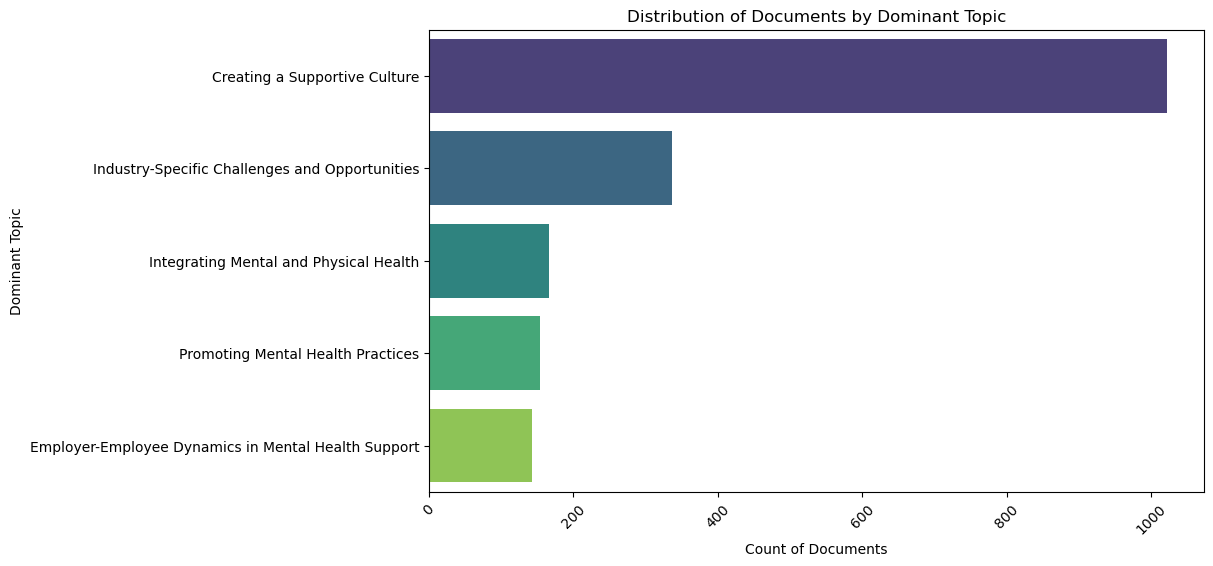

In [99]:
# Flatten the list so each document has a single most relevant topic number
briefly_df2['Dominant Topic'] = briefly_df2['Top Topics'].apply(lambda x: x[0] if x else None)

# Count the occurrences of each dominant topic and convert to a DataFrame
dominant_topic_counts = briefly_df2['Dominant Topic'].value_counts().rename_axis('Dominant Topic').reset_index(name='Counts')

# Now, replace numeric topic IDs with their corresponding labels
dominant_topic_counts['Dominant Topic'] = dominant_topic_counts['Dominant Topic'].map(topic_labels)

# # Verify the DataFrame structure
# print(dominant_topic_counts.head())

plt.figure(figsize=(10, 6))

# Ensure 'Dominant Topic' is used as the category axis and 'Counts' as the value axis
sns.barplot(x='Counts', y='Dominant Topic', data=dominant_topic_counts, palette='viridis')

plt.xlabel('Count of Documents')
plt.ylabel('Dominant Topic')
plt.title('Distribution of Documents by Dominant Topic')
plt.xticks(rotation=45)  # Optional, depending on your data's readability

plt.show()


C:\Users\Lim Yin Yao\AppData\Local\Temp\ipykernel_17292\2089281974.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='Dominant Topic', data=dominant_topic_counts, palette='viridis')


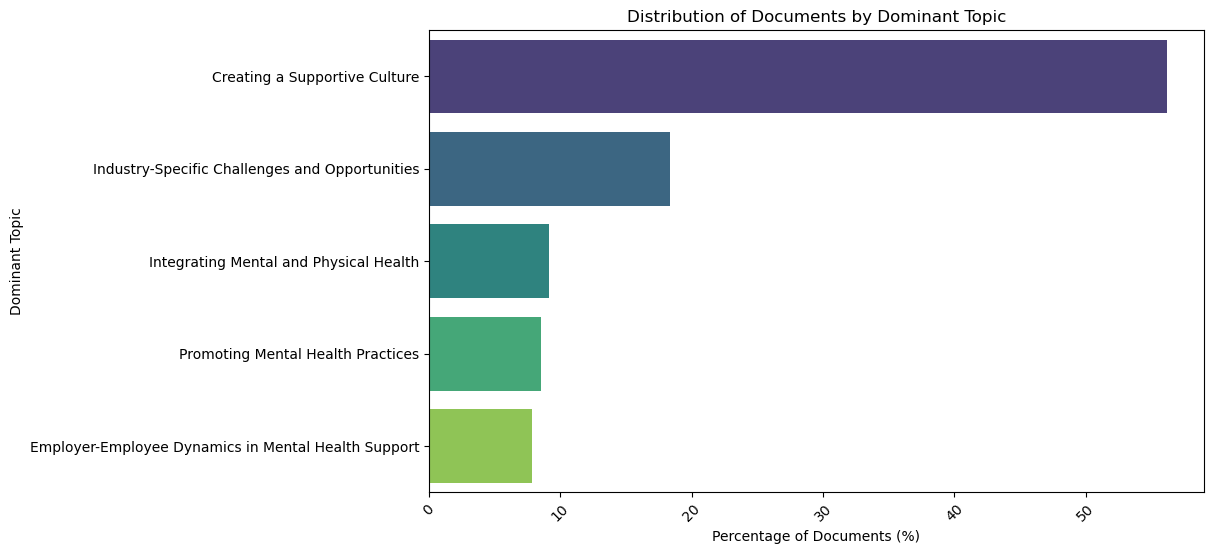

In [111]:
# Flatten the list so each document has a single most relevant topic number
briefly_df2['Dominant Topic'] = briefly_df2['Top Topics'].apply(lambda x: x[0] if x else None)

# Count the occurrences of each dominant topic
dominant_topic_counts = briefly_df2['Dominant Topic'].value_counts().rename_axis('Dominant Topic').reset_index(name='Counts')

# Calculate the percentage of documents for each dominant topic
total_documents = len(briefly_df2)
dominant_topic_counts['Percentage'] = (dominant_topic_counts['Counts'] / total_documents) * 100

# Replace numeric topic IDs with their corresponding labels
dominant_topic_counts['Dominant Topic'] = dominant_topic_counts['Dominant Topic'].map(topic_labels)

plt.figure(figsize=(10, 6))

# Plotting with 'Percentage' instead of 'Counts'
sns.barplot(x='Percentage', y='Dominant Topic', data=dominant_topic_counts, palette='viridis')

plt.xlabel('Percentage of Documents (%)')
plt.ylabel('Dominant Topic')
plt.title('Distribution of Documents by Dominant Topic')
plt.xticks(rotation=45)  # Optional, adjust if needed for better readability

plt.show()


#### Word Count of Key Topics

C:\Users\Lim Yin Yao\AppData\Local\Temp\ipykernel_17292\1841638338.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\Lim Yin Yao\AppData\Local\Temp\ipykernel_17292\1841638338.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\Lim Yin Yao\AppData\Local\Temp\ipykernel_17292\1841638338.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\Lim Yin Yao\AppData\Local\Temp\ipykernel_17292\1841638338.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\Lim Yin Yao

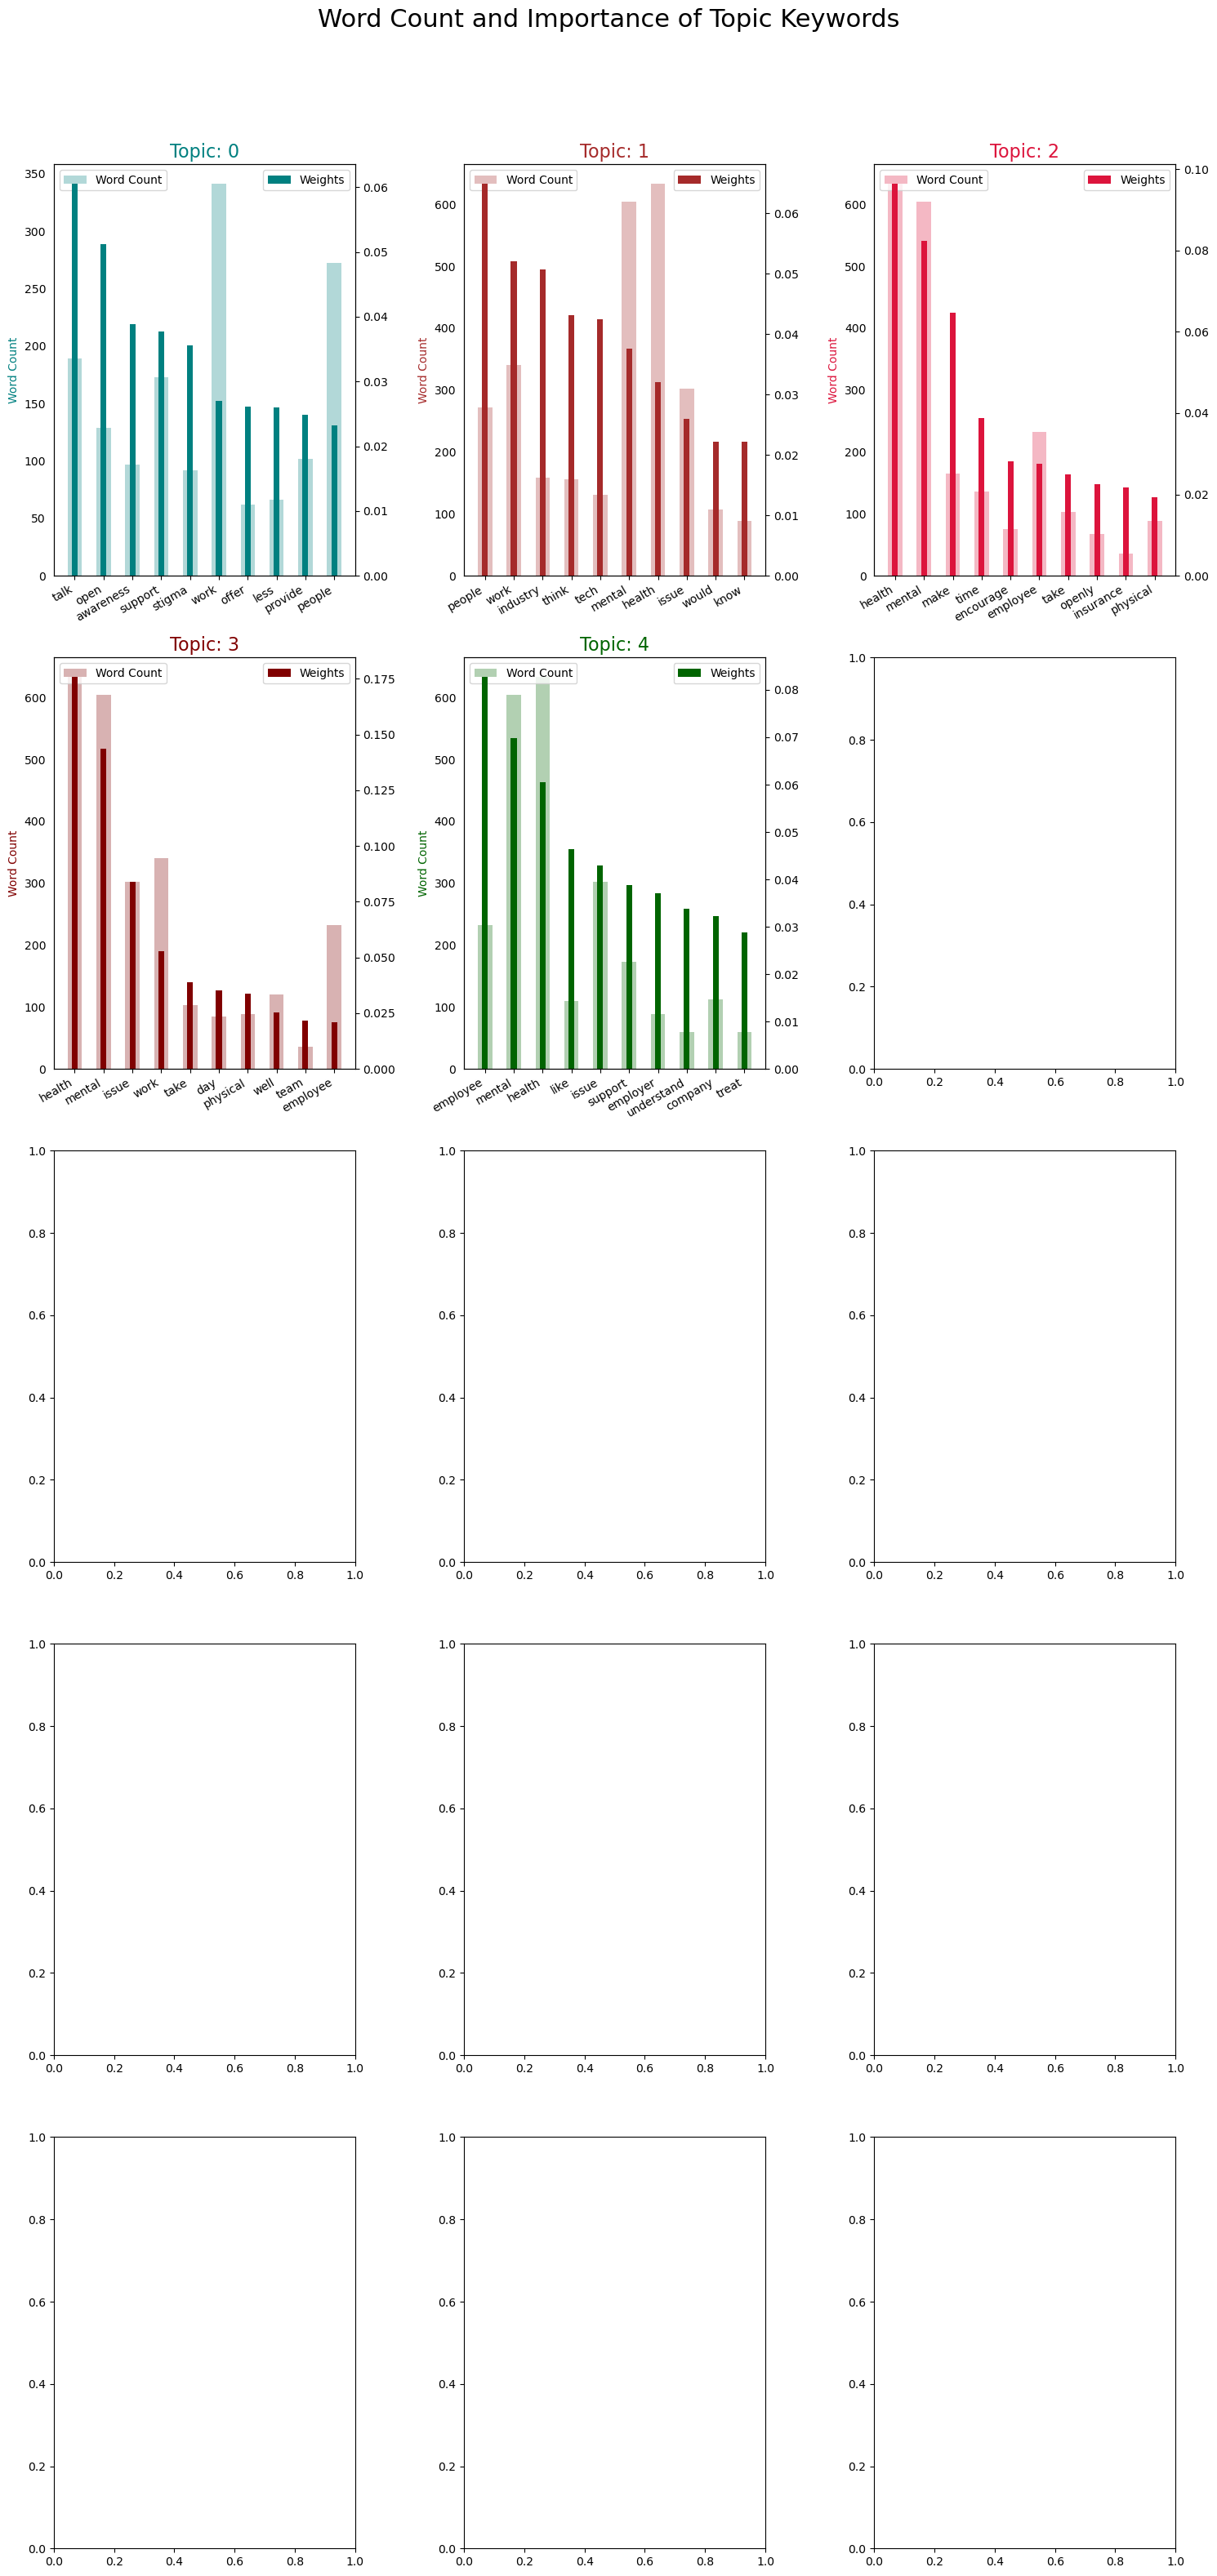

In [100]:
topics = lda_model.show_topics(num_topics=num_topics, formatted=False)
data_flat = [w for w_list in briefly_df2['Tokenised Content'] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 3, figsize=(15,30),facecolor='white')
cols = ['#008080', '#A52A2A', '#DC143C', '#800000', '#006400', '#556b2f', '#002366', '#ff8c00', '#FF1493', '#9400D3',
        '#ba55d3', '#b8860b', '#C71585', '#00ff7f', '#00004C', '#00008B', '#B8860B', '#DEB887', '#8A2BE2', '#1b364a']

for i, ax in enumerate(axes.flatten()):
    if i > num_topics - 1: # break when all topics are shown
        break
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')


fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.savefig('unigram_lda_topics_after.png',facecolor=fig.get_facecolor(), transparent=True)
plt.show()

In [101]:
# Ensure the notebook mode is enabled for PyLDAvis in Jupyter
pyLDAvis.enable_notebook()

# Prepare the visualization data and display the visualization
# Make sure to use your actual LDA model variable here
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
# pyLDAvis.show(vis, local=False)
pyLDAvis.display(vis)